# Investigation of Methane Activation over NiO/CZ using in-situ FTIR Spectroscopy

# Import Packages and Pre-Defined Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, report_fit, Minimizer
import time
from sklearn.metrics import r2_score
from ipynb.fs.full.functions import get_first_nbr_from_str, baseline_als, Data_import

In [2]:
from ipynb.fs.full.functions import Voigt, Gaussian
from ipynb.fs.full.functions import Generate_data, Generate_params, loss_func, Plot_data, Plot_com_data, Final_plot, Print_var, Final_print
from ipynb.fs.full.functions import Generate_Vec_IG, Generate_data_IG, loss_func_IG, Generate_params_IG, Plot_data_IG, Plot_com_data_IG

# Import Data

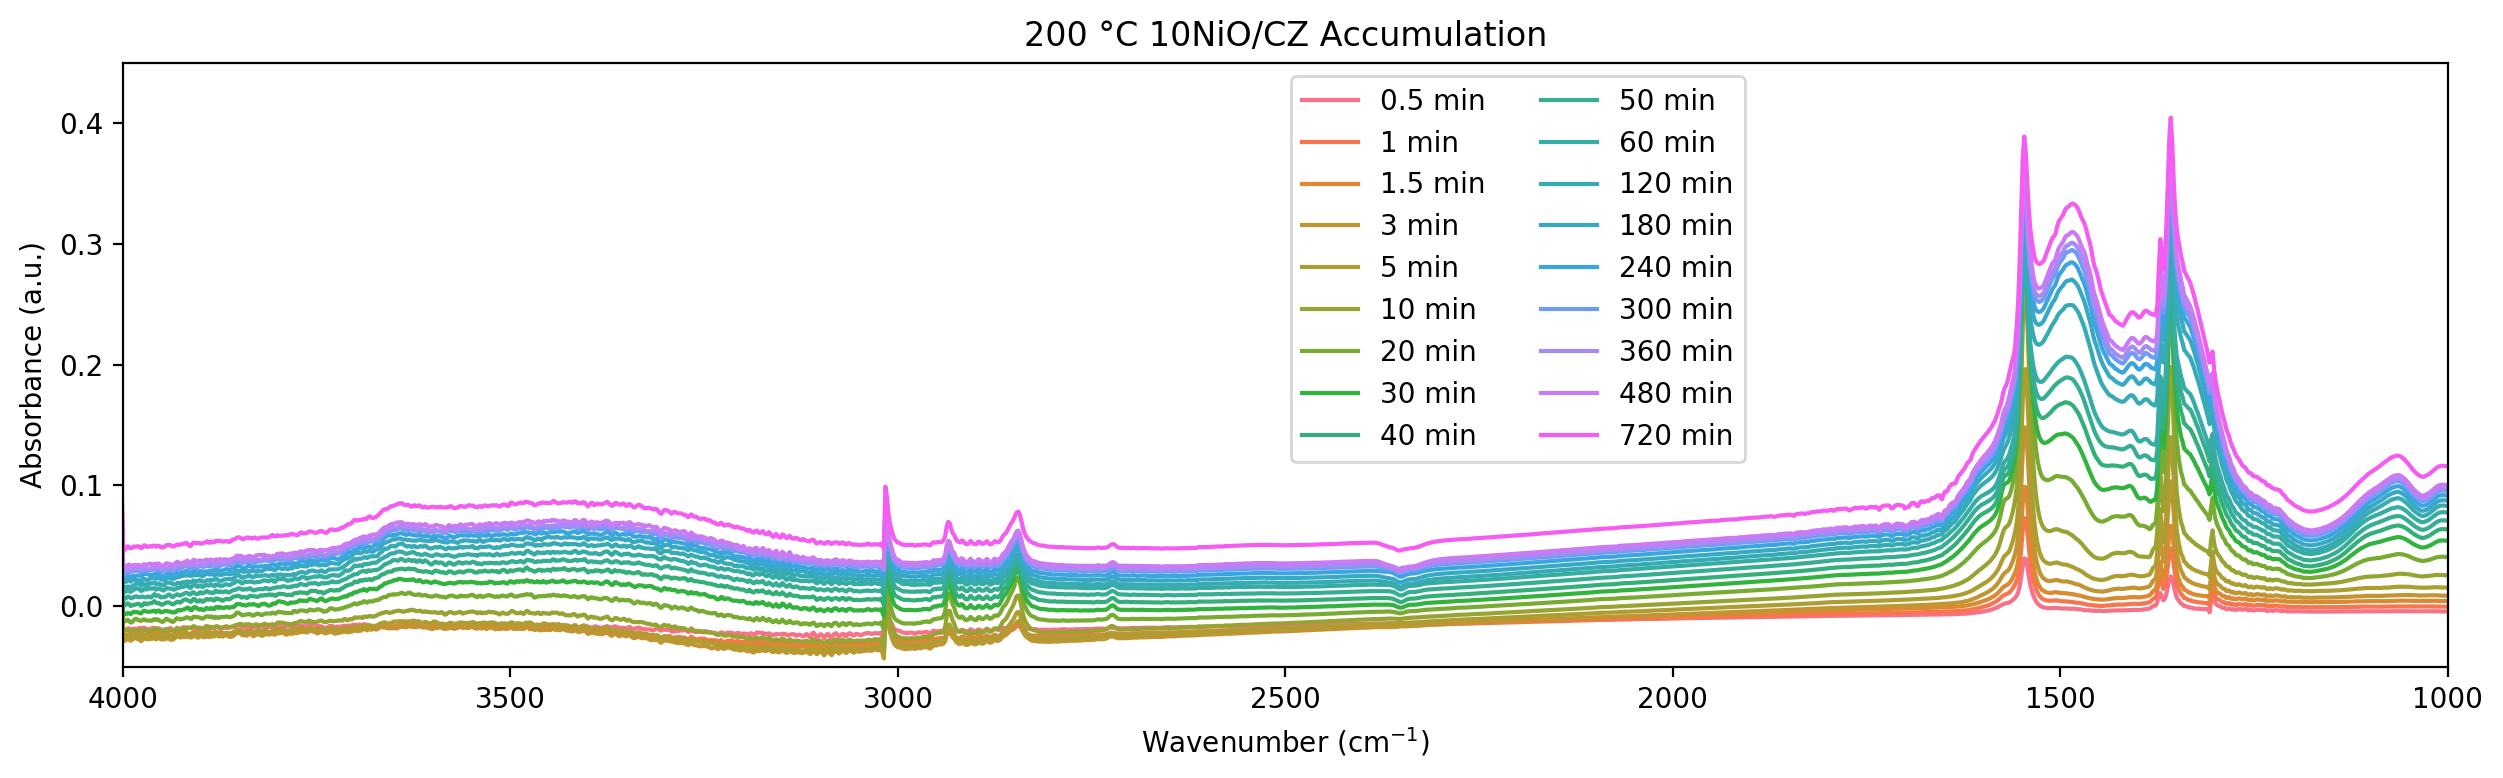

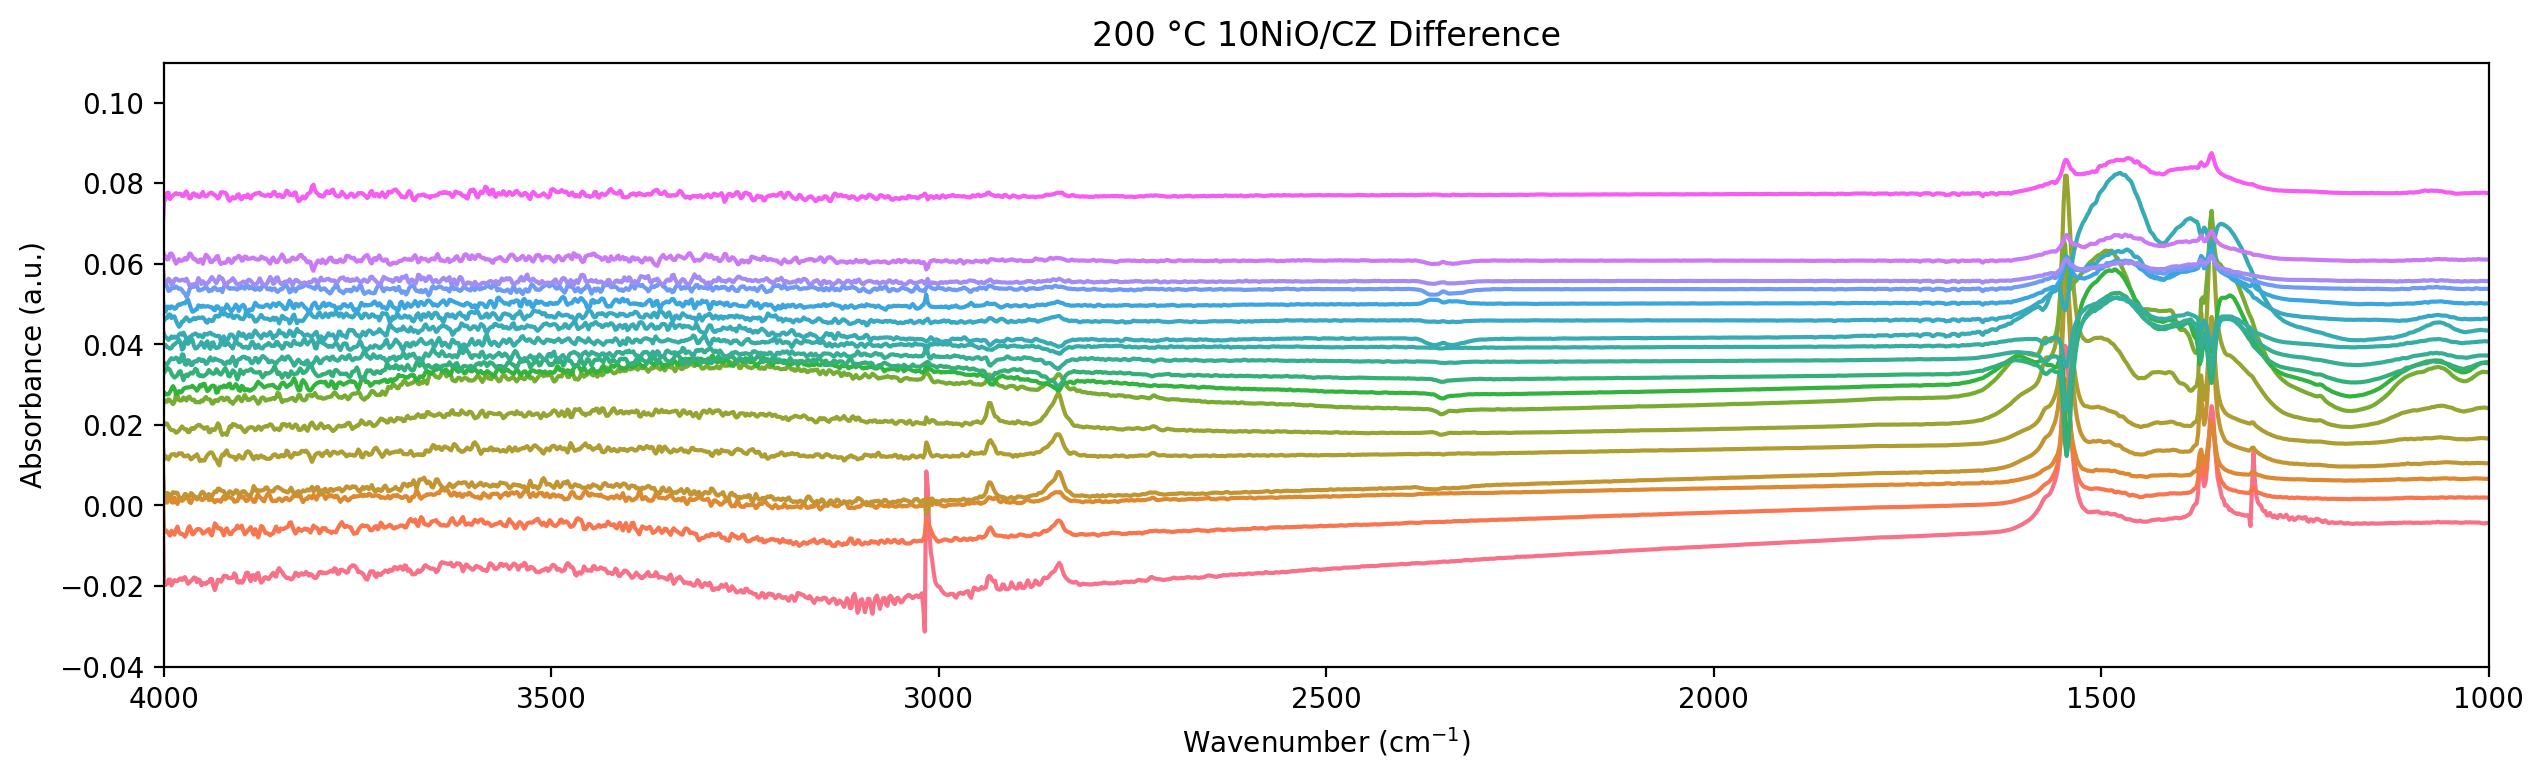

In [143]:
result = Data_import('data/20201107.xlsx', 200, '10NiO/CZ', 1.15,
                     ylims = np.array([[-0.05,0.45],[-0.04,0.11]]), 
                     Incre=np.array([0.006,0.004]))
df = result['Data']
dif = result['Dif']
acu = result['Acu']
Time = result['Time']

## Process Data by Region

30.0
40.0
50.0
60.0
120.0
The fitted region started at 2809.82 cm-1, and ended at 2962.172 cm-1.


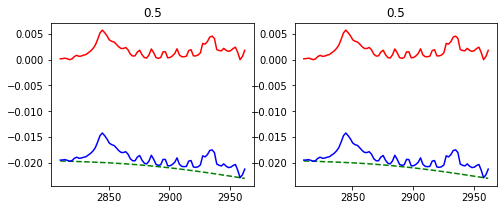

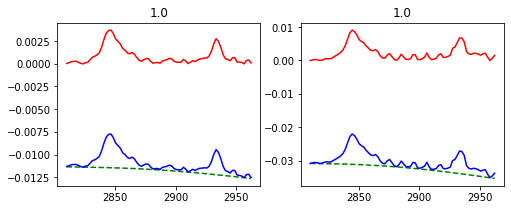

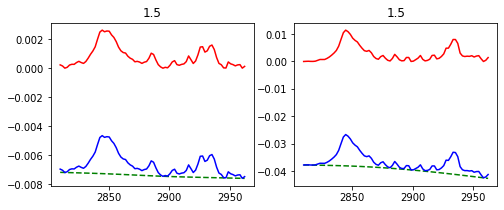

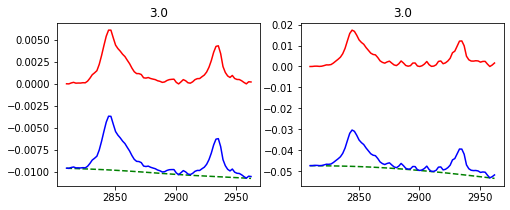

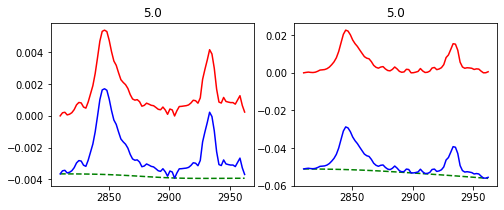

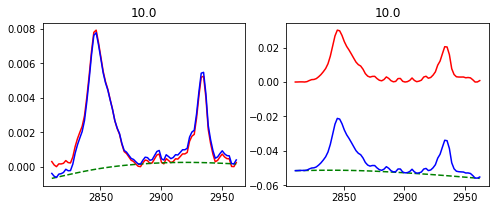

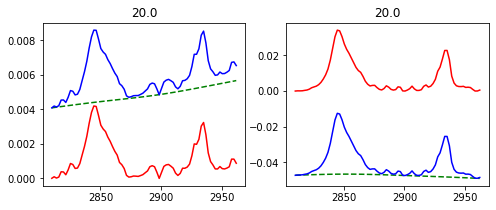

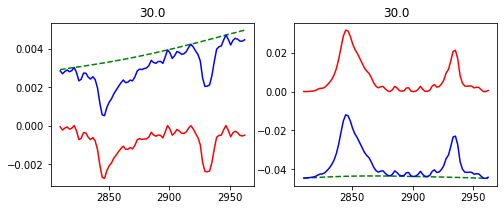

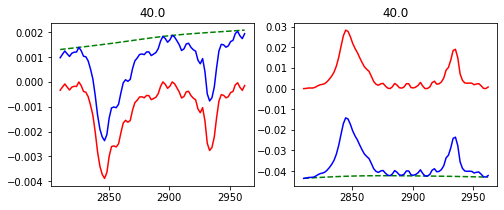

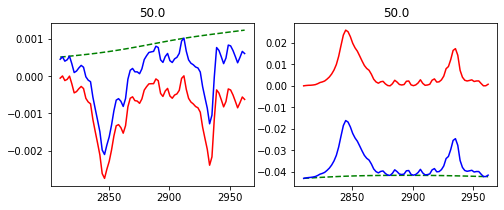

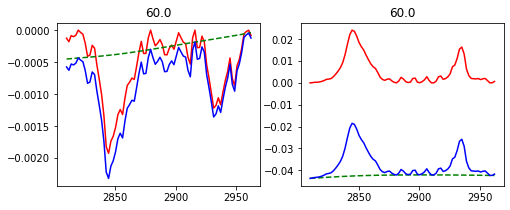

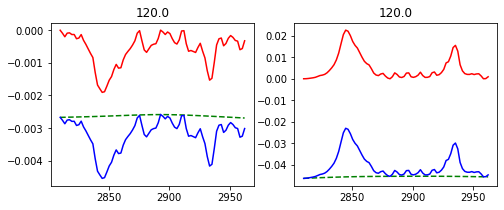

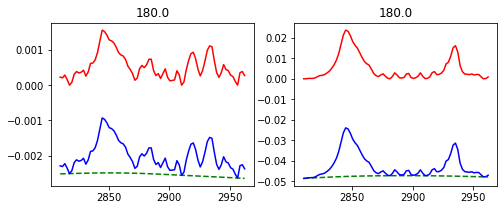

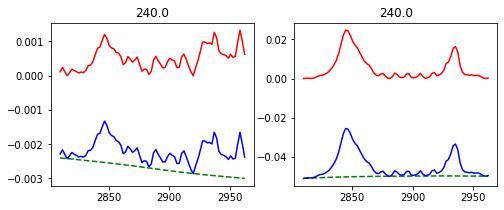

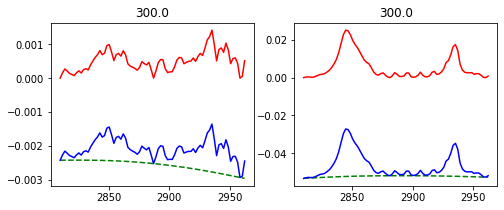

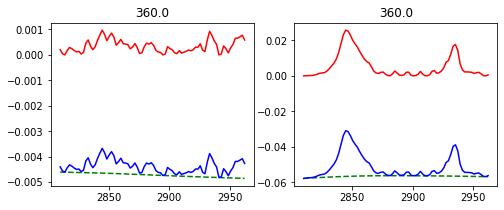

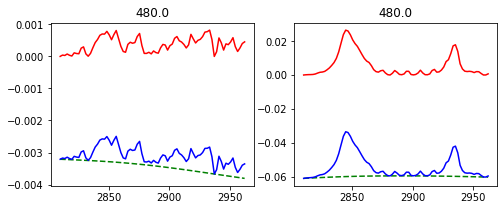

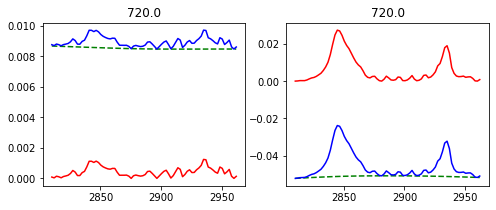

In [24]:
column_num = np.shape(dif)[1]
SCH = 1250     #start index of CH 
ECH = 1330     #end index of CH
a = np.transpose(acu[[dif.columns[0]]][SCH:ECH].to_numpy())
WN = a[0]
CH_acu = []
CH_dif = []

for i in range(1,column_num):
    a = np.transpose(dif[[dif.columns[i]]][SCH:ECH].to_numpy())
    a = a[0]
    ##baseline correction
    if a[23] < a[0]:
        print(get_first_nbr_from_str(dif.columns[i]))
        b = -a
        bsl = baseline_als(b, 105, 0.0001)
        y = -(b - bsl)
        bsl = -bsl
    else:
        bsl = baseline_als(a, 105, 0.0001)
        y = a - bsl
    a_acu = np.transpose(acu[[dif.columns[i]]][SCH:ECH].to_numpy())[0]
    bsl_acu = baseline_als(a_acu, 105, 0.0001)
    y_acu = a_acu-bsl_acu
    CH_dif.append(y)
    CH_acu.append(y_acu)
    fig,ax = plt.subplots(1,2,figsize=(8,3))
    ax[0].plot(WN,y,'r')
    ax[0].plot(WN,bsl,'g--')
    ax[0].plot(WN,a,'b')
    ax[0].set_title(Time[i-1])
    ax[1].plot(WN,y_acu,'r')
    ax[1].plot(WN,bsl_acu,'g--')
    ax[1].plot(WN,a_acu,'b')
    ax[1].set_title(Time[i-1]) 
print('The fitted region started at {0} cm-1, and ended at {1} cm-1.'.format(WN[0], WN[-1]))
x_CH = np.array(WN)
y_CH = np.array(CH_acu)

In [5]:

S = 455
E = 675
b = np.transpose(dif[[dif.columns[0]]][S:E].to_numpy())
WN = b[0]
CC = []
CC_acu = []
for i in range(1,column_num):
    a = np.transpose(dif[[dif.columns[i]]][S:E].to_numpy())
    b = np.transpose(acu[[dif.columns[i]]][S:E].to_numpy())
    CC.append(a[0])
    CC_acu.append(b[0])
x_CC = np.array(WN)
y_CC = np.array(CC)

print('The fitted region started at {0} cm-1, and ended at {1} cm-1.'.format(WN[0], WN[-1]))

The fitted region started at 1276.665 cm-1, and ended at 1699.006 cm-1.


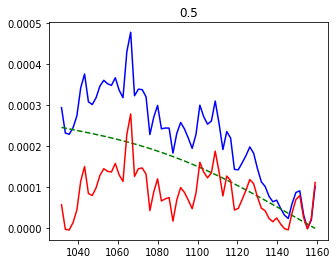

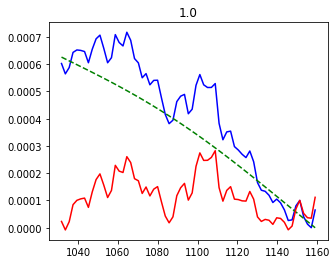

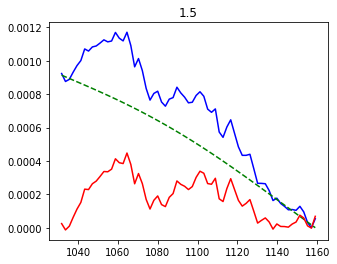

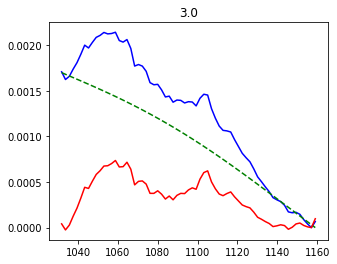

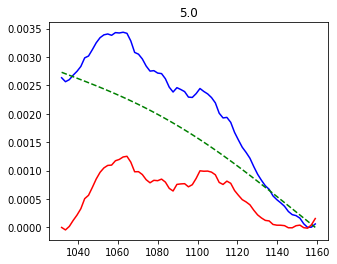

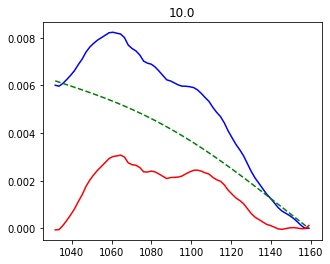

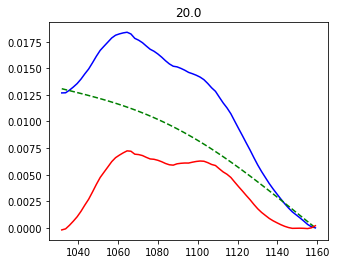

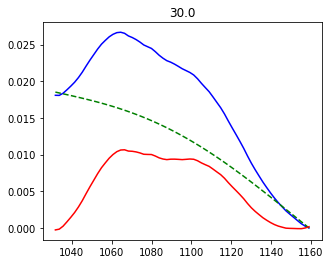

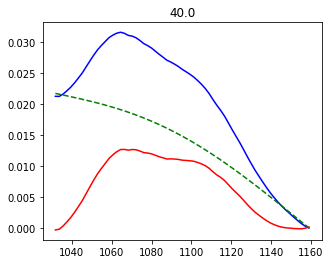

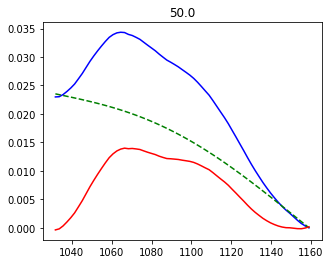

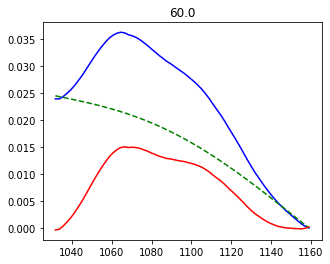

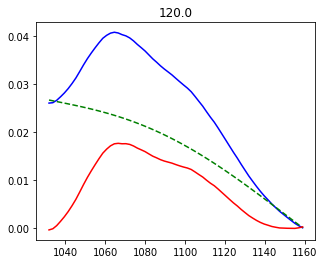

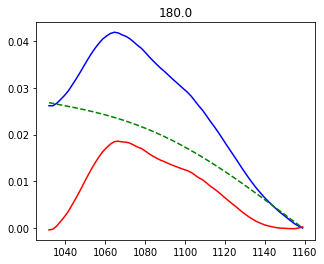

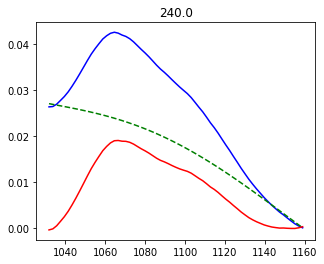

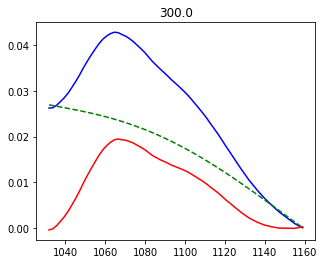

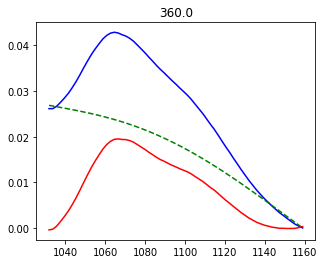

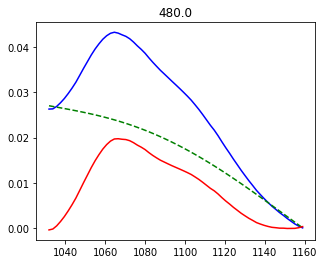

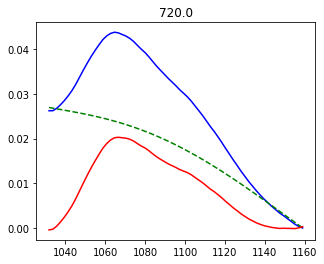

In [15]:
SCO = 328
ECO = 395
LCO = ECO-SCO
b = np.transpose(dif[[dif.columns[0]]][SCO:ECO].to_numpy())
WN = b[0]
CO = []

for i in range(1,column_num):
    a = np.transpose(acu[[dif.columns[i]]][SCO:ECO].to_numpy())
    bsl = baseline_als(a[0], 1005, 0.002)
    y = a[0] - bsl
    CO.append(y)
    fig = plt.figure(figsize=(5,4))
    plt.plot(WN,a[0]-a[0].min(),'b-')
    plt.plot(WN,bsl-bsl.min(),'g--')
    plt.plot(WN,CO[-1],'r-')
    plt.title(Time[i-1])


x_CO = np.array(WN)
y_CO = np.array(CO)

# Data Analysis using the Algorithm
## Fitting the C-H Stretching

In [145]:
Vec_IG = {'Mus':np.array([2861.9,2952,2846.1,2934.2]),
          'Sigmas':np.array([6.7,3.6,5.1,2.9]),
          'Types':np.array([1,1,1,1]),
          'Lims':None}

In [146]:
t0 = time.time()
fit_params_IG = Generate_params_IG(x_CH,Vec_IG,ndata =18)

fitter = Minimizer(loss_func_IG, fit_params_IG, fcn_args=(x_CH, y_CH, Vec_IG))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

The time cost is: 59.09144902229309


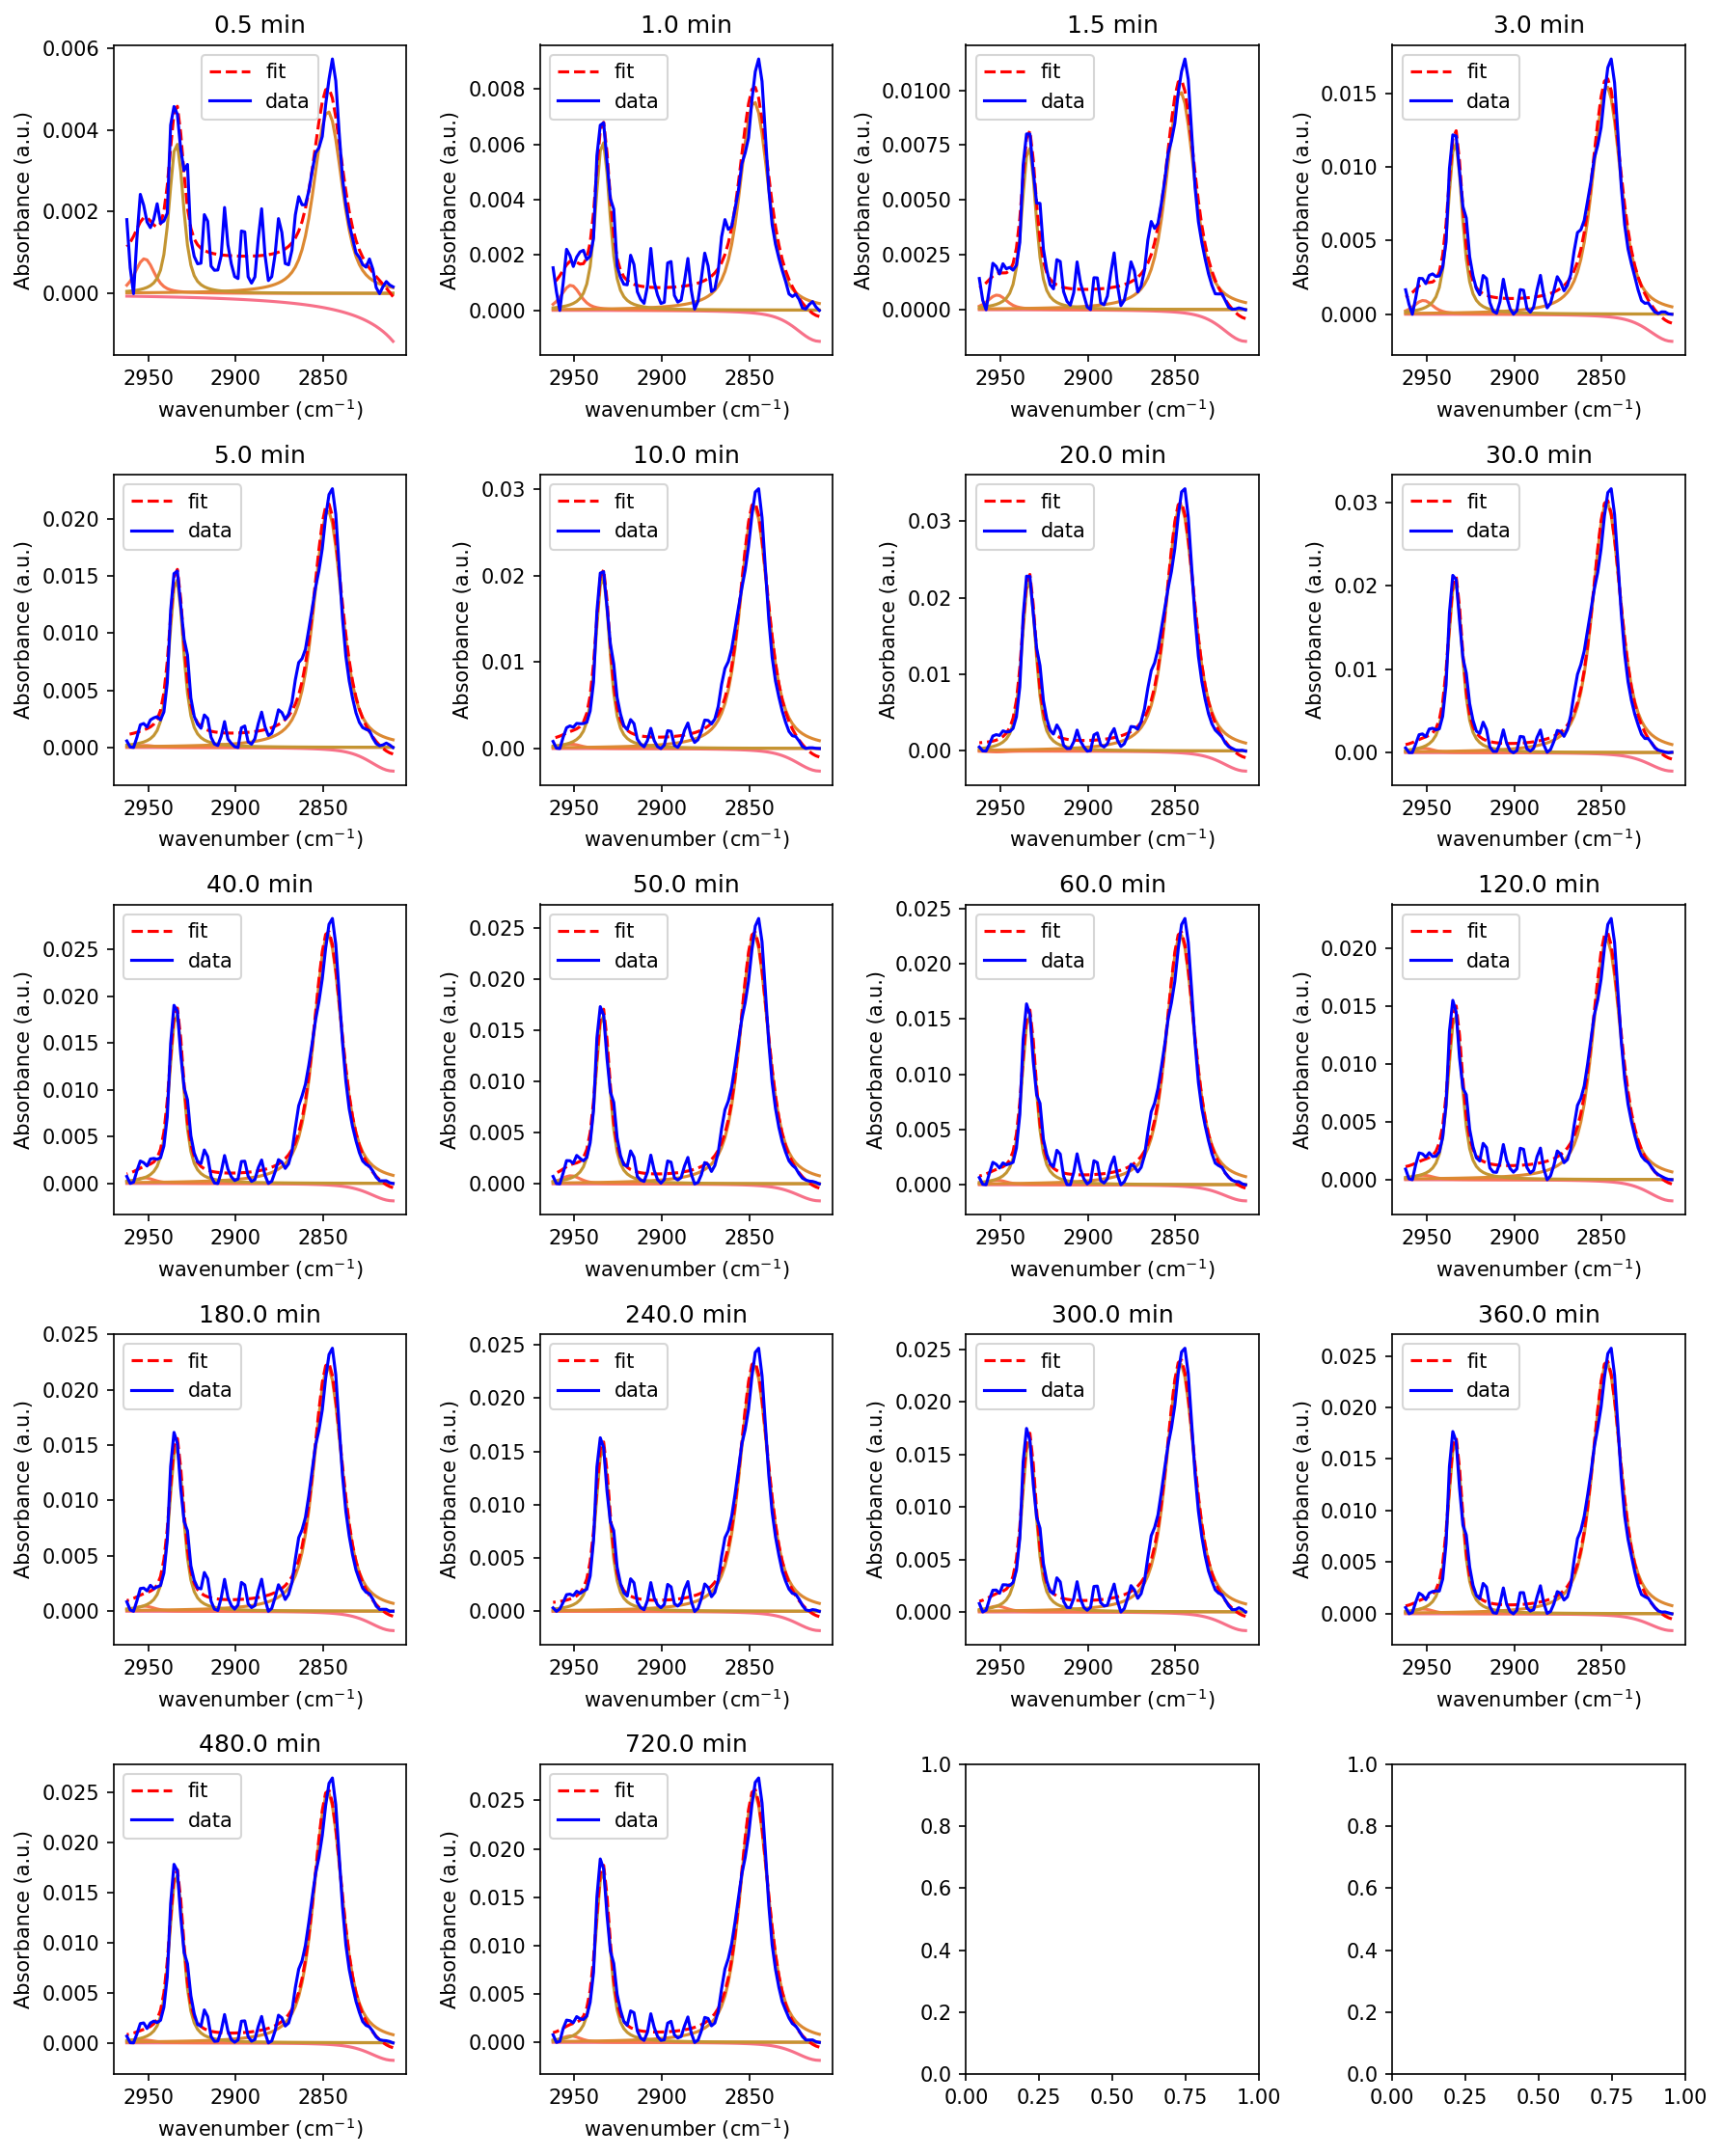

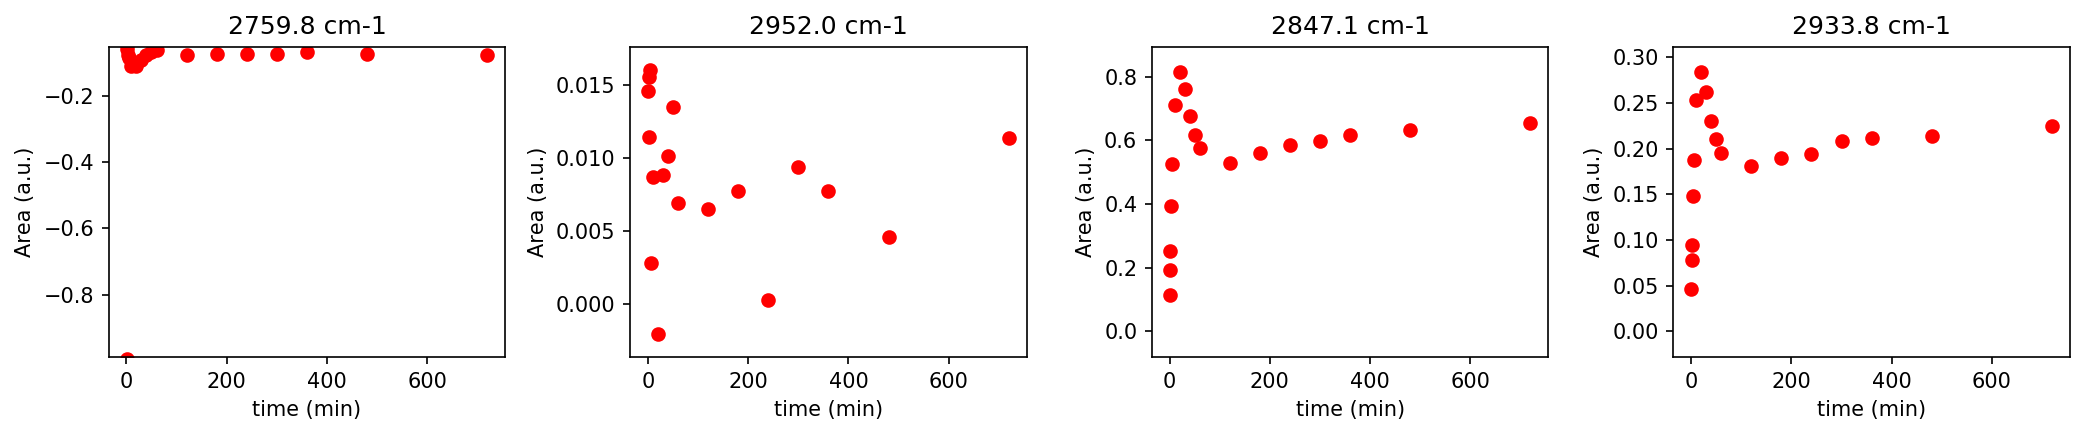

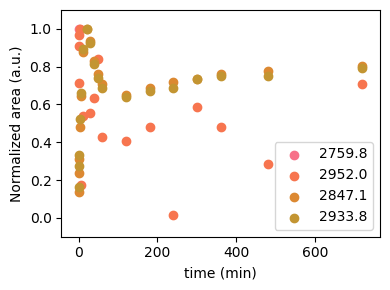

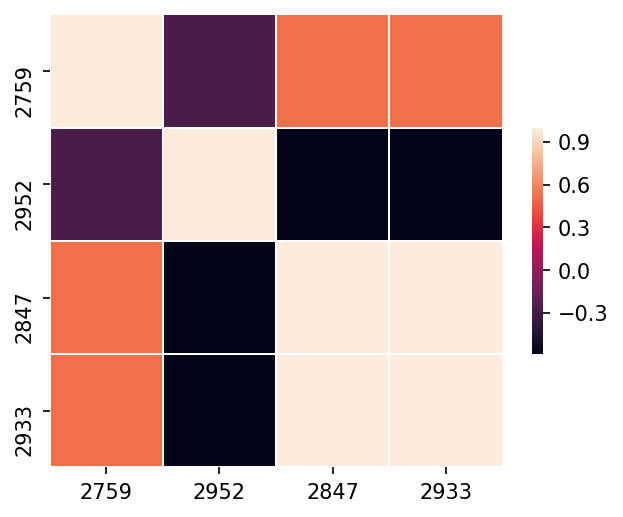

{'Peak Pos': [2759, 2952, 2847, 2933],
 'Amps': array([[-9.92308282e-01,  1.46230208e-02,  1.12761044e-01,
          4.65816882e-02],
        [-4.70865343e-02,  1.55611655e-02,  1.91024565e-01,
          7.74312904e-02],
        [-6.04738377e-02,  1.14137917e-02,  2.51627770e-01,
          9.40073839e-02],
        [-7.74126242e-02,  1.60374282e-02,  3.92827965e-01,
          1.48532104e-01],
        [-8.67714569e-02,  2.81923509e-03,  5.25929354e-01,
          1.87438037e-01],
        [-1.09714942e-01,  8.67341064e-03,  7.11791557e-01,
          2.53578195e-01],
        [-1.09684536e-01, -2.02480823e-03,  8.13226331e-01,
          2.83362233e-01],
        [-9.28276229e-02,  8.86398684e-03,  7.61546847e-01,
          2.61720910e-01],
        [-7.80864584e-02,  1.01453366e-02,  6.74821197e-01,
          2.30571482e-01],
        [-6.95818707e-02,  1.34782597e-02,  6.17062249e-01,
          2.09960466e-01],
        [-6.11625502e-02,  6.89841447e-03,  5.74102718e-01,
          1.95037428e-0

In [147]:
params_IG = result.params
Plot_data_IG(params_IG,x_CH,y_CH,Vec_IG,Time,False)

In [157]:
Vec_IG_struc = {'Peaks':[[0,1,2,3]], #Index of peaks that are from the same species
                'Types':[[1,1,1,1]]} #Peak type of each peak in this vector

Vec_fit = Generate_Vec_IG(params_IG,Vec_IG_struc,18)
Vec_fit['Alphas'] = None
Vec_fit['Vec0']['Mus'] = np.array([2847.1,2860.9,2940.8,2951.8])
Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
                           'Specs':np.array([[2840,2850,2900,2945],
                                            [2875,2875,4000,4000],
                                            [1.5,1.5,1.5,0.6],
                                            [6.5,6.5,6.5,6.5],
                                            [0.00001,0.00001,0.0001,0.001]]),
                           'Pos': None}


In [158]:
t0 = time.time()
fit_params = Generate_params(x_CH,Vec_fit,ndata = 18)

fitter = Minimizer(loss_func, fit_params, fcn_args=(x_CH, y_CH, Vec_fit))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

0 8.709999656928899 1.5 6.5
0 2847.1 2840.0 2875.0
0 3.6 1.5 6.5
0 2860.9 2850.0 2875.0
0 5.291803450127757 1.5 6.5
0 2940.8 2910.8 2970.8
0 2.638076386086045 0.6 6.5
0 2951.8 2945.0 2981.8
The time cost is: 7.8160130977630615


In [159]:
new_params = result.params
yhat_CH = Generate_data(new_params,x_CH,Vec_fit,ndata=18)
print('The R2 score of the fit is: {:.2f}'.format(r2_score(y_CH.flatten(), yhat_CH.flatten())))

The R2 score of the fit is: 0.98


Plotting.....


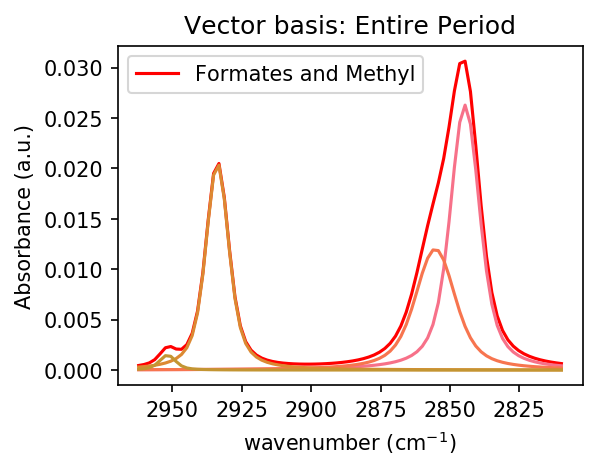

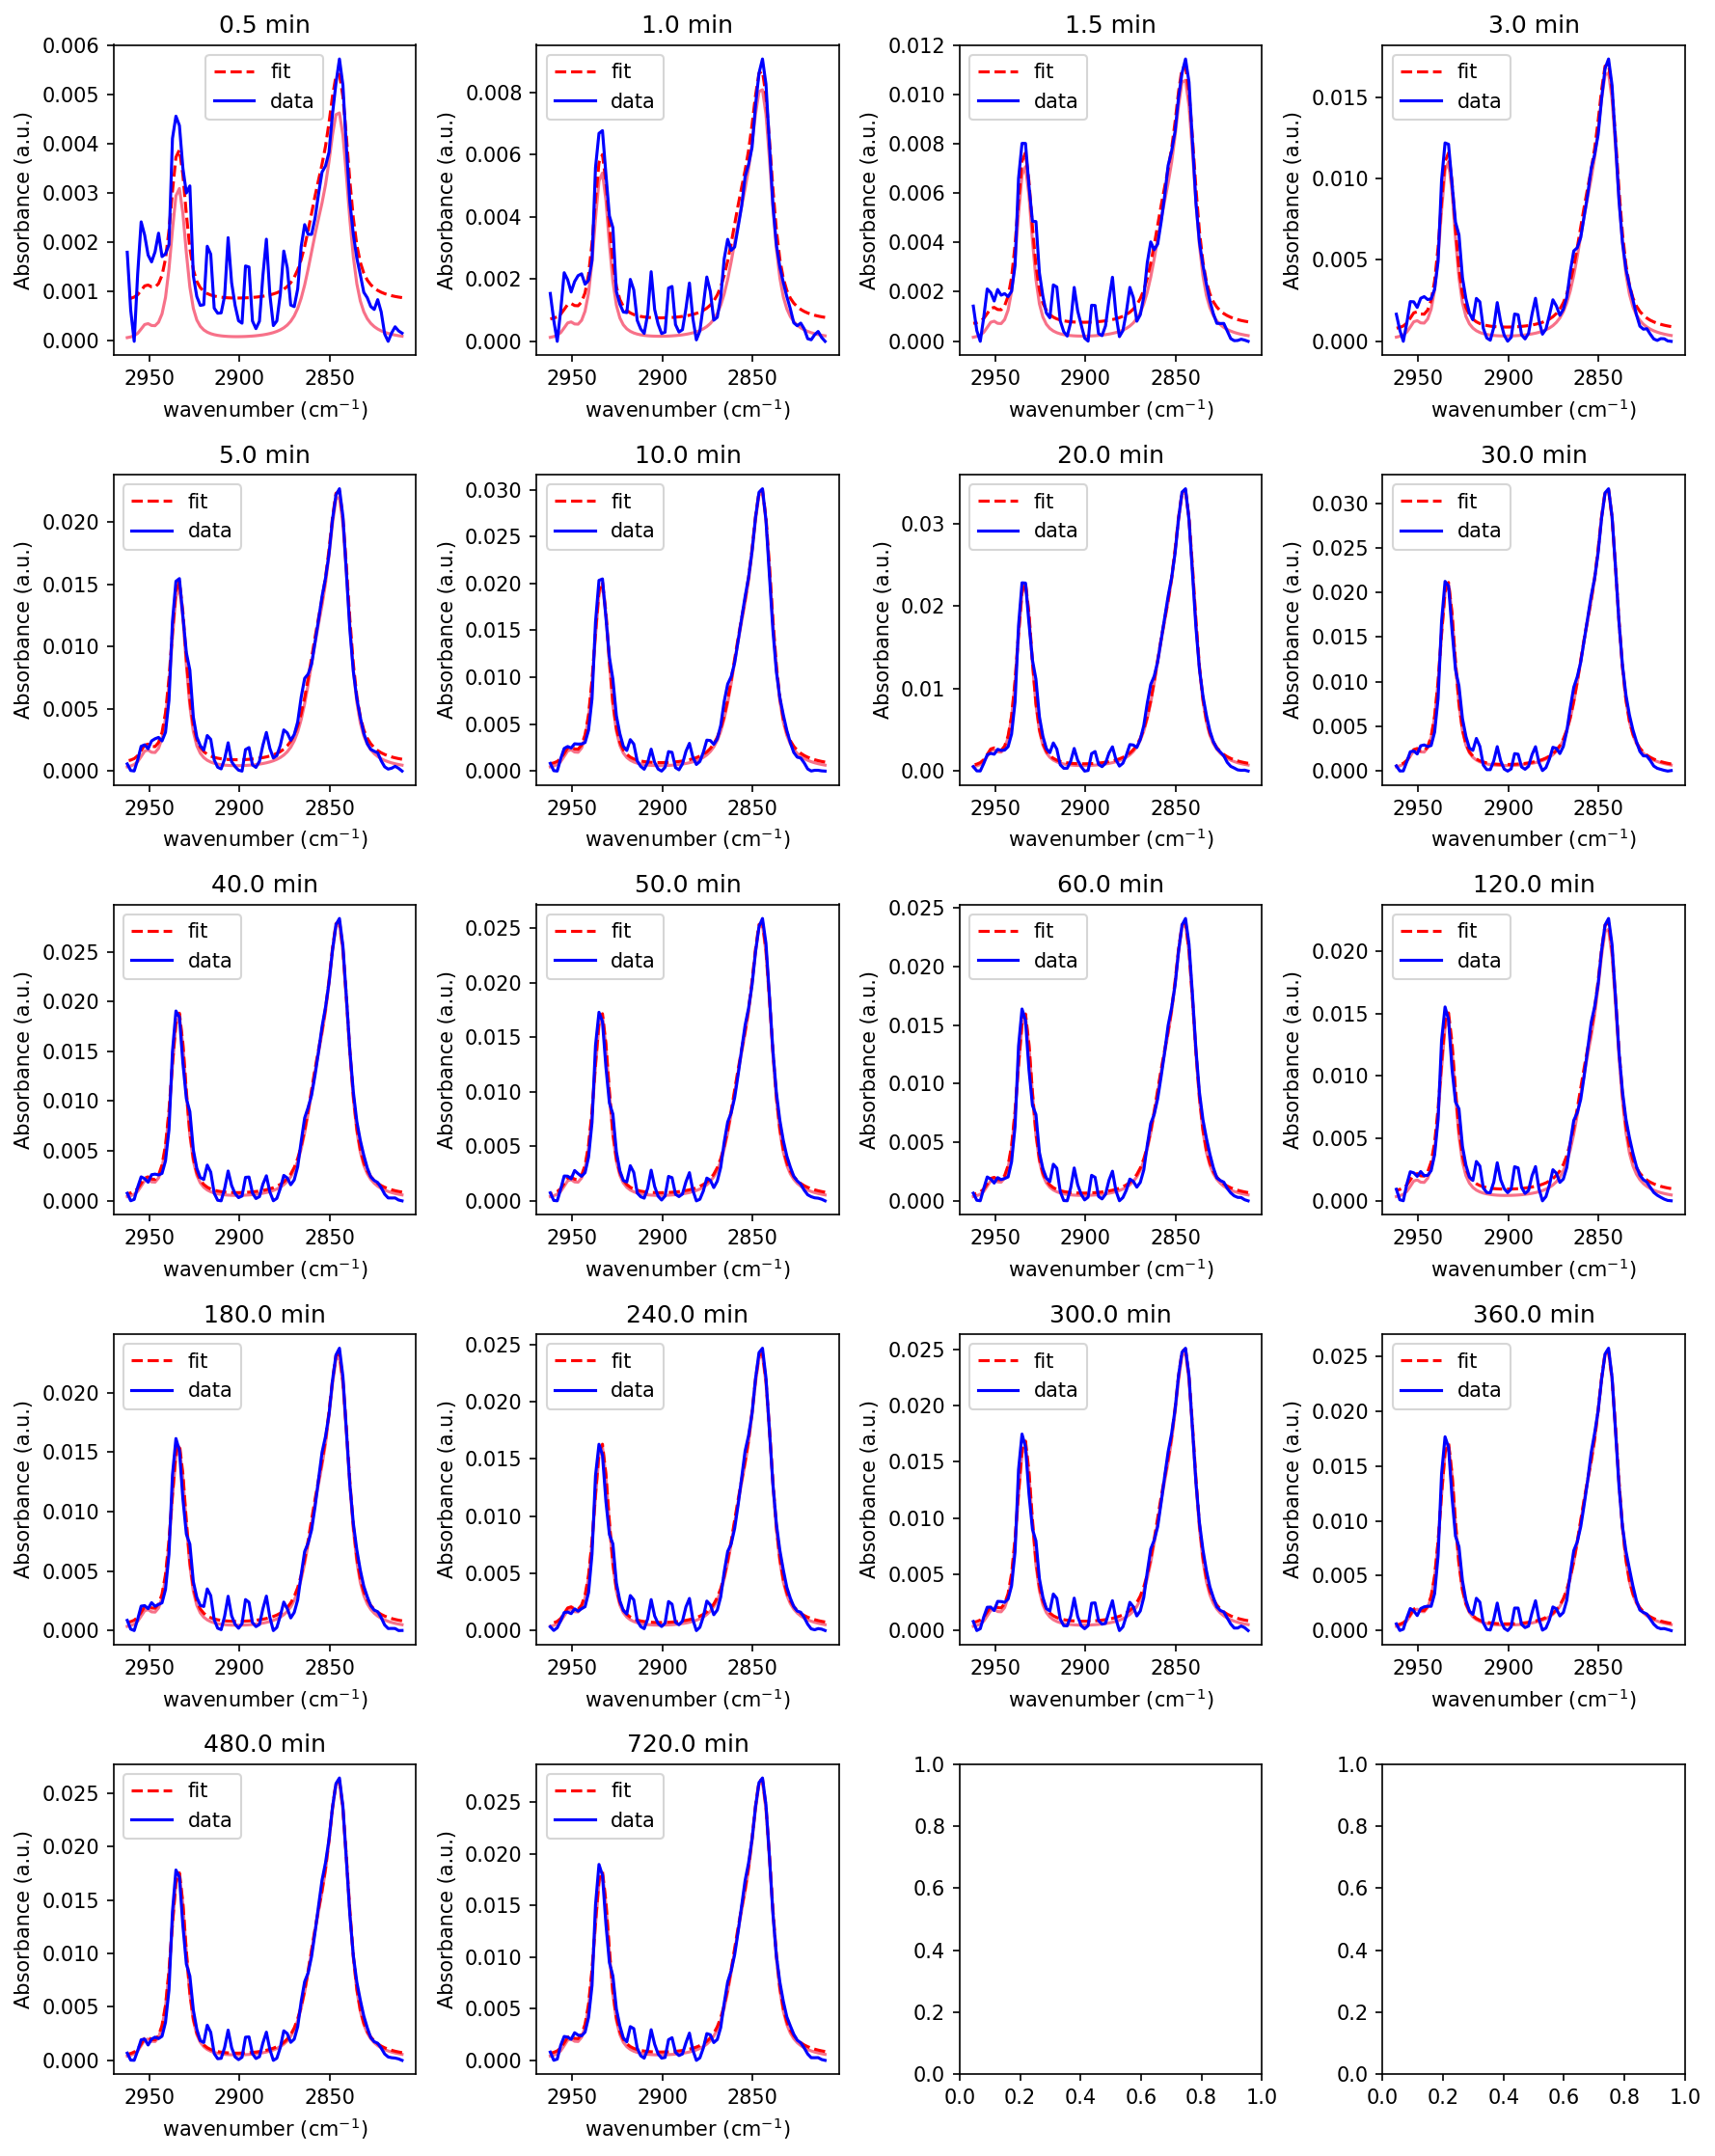

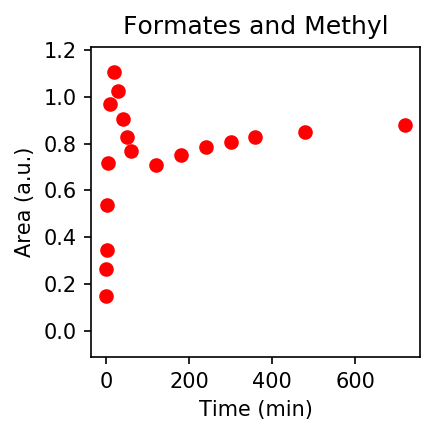

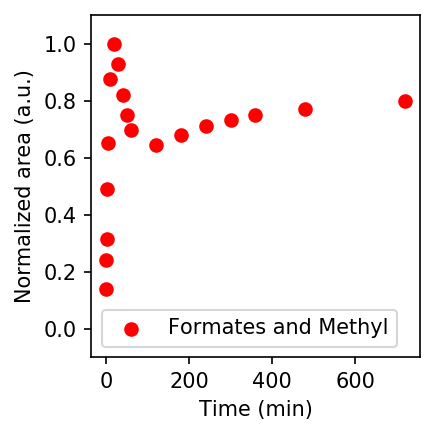

In [160]:
Vec_name=np.array(['Formates and Methyl'])
data_CH = Plot_data(new_params,x_CH,y_CH,Vec_fit,Time,Vec_name,False)

In [161]:
Print_var(new_params,Vec_name,Vec_IG_struc)

Species		Type		Peak (cm-1)	Variance (cm-1)	
Formates and Methyl	Voigt		2844.6		3.5
		Voigt		2855.3		4.8
		Voigt		2933.8		2.7
		Voigt		2951.7		1.9


## Fitting the 1300-1700 cm$^{-1}$ Region

### Fitting the initial stage (0,10) min

In [54]:
Vec_IG_CC0 = {'Mus':np.array([1580.5,1544.5,1548.3,1488.25,1424.5, 1349.9,1371.1,1357.8,1304]),
             'Sigmas':np.array([10,3.624,17.8,13.4,17.9, 22.9,1.764,4.375,2]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':True,
                     'Mus_min':np.array([1590,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.]),
                    'Mus_max':None}             
             }


In [55]:
t0 = time.time()
ndata = 6
fit_params_IG = Generate_params_IG(x_CC,Vec_IG_CC0,ndata = ndata)
fitter = Minimizer(loss_func_IG, fit_params_IG, fcn_args=(x_CC, y_CC[:ndata], Vec_IG_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)


The time cost is: 677.7160398960114


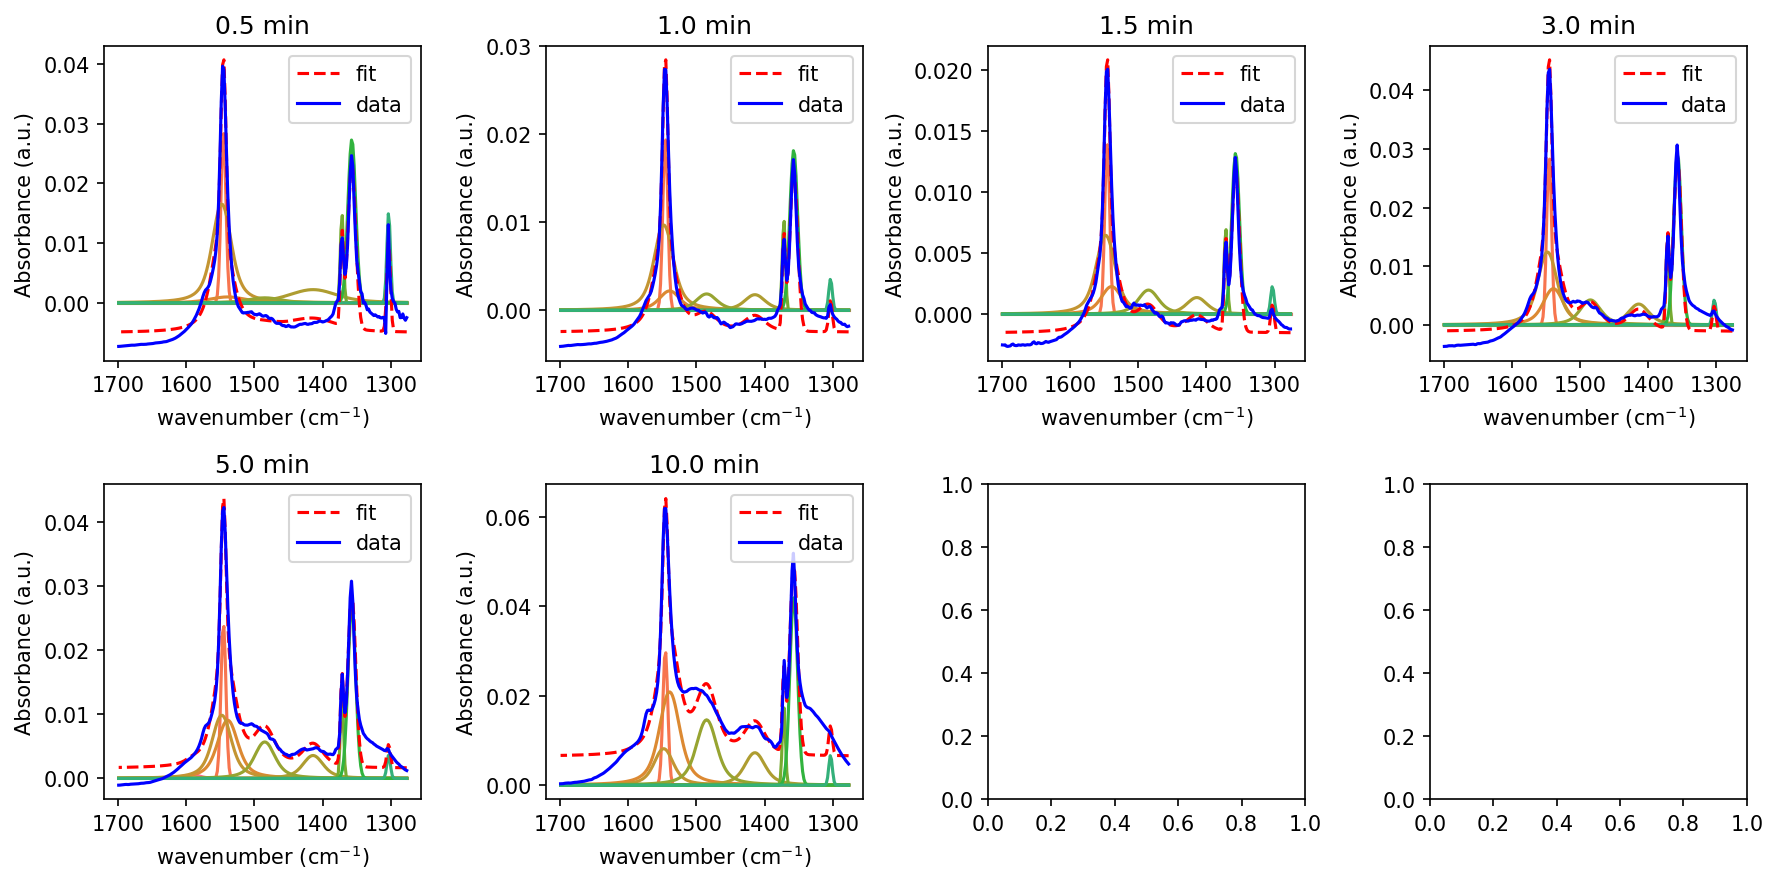

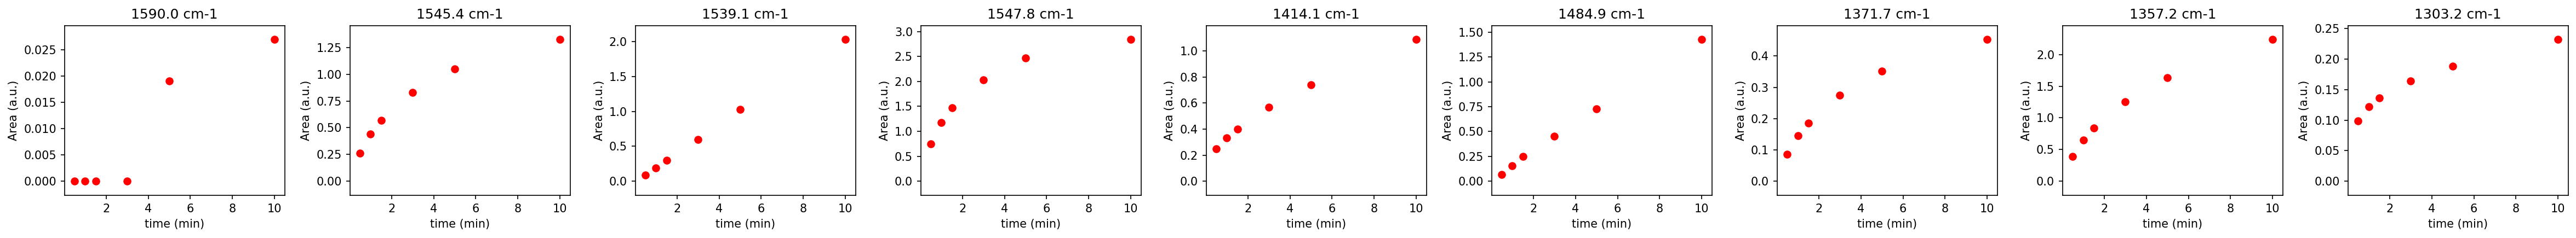

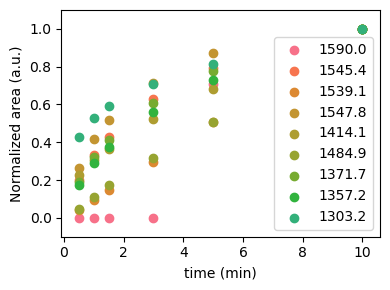

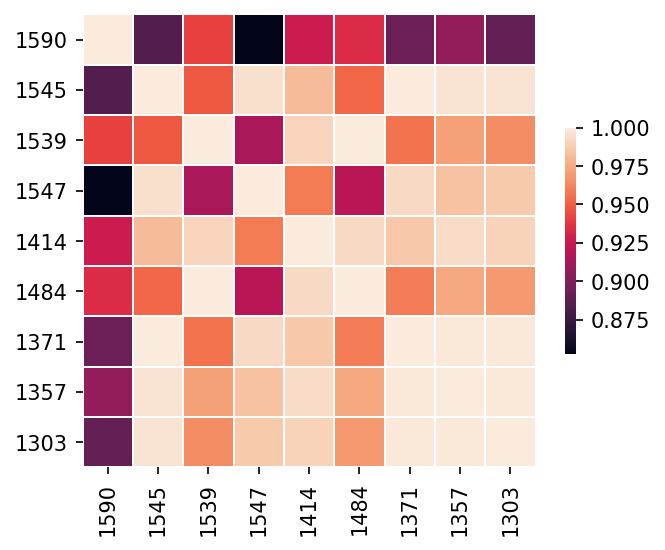

{'Peak Pos': [1590, 1545, 1539, 1547, 1414, 1484, 1371, 1357, 1303],
 'Amps': array([[3.33066907e-16, 2.62074224e-01, 8.59644143e-02, 7.43453151e-01,
         2.48601719e-01, 6.59763437e-02, 8.60399837e-02, 3.90306688e-01,
         9.87827045e-02],
        [7.88792235e-07, 4.40694512e-01, 1.91278573e-01, 1.17866520e+00,
         3.33336407e-01, 1.54810354e-01, 1.45340976e-01, 6.49414486e-01,
         1.21955064e-01],
        [7.88792235e-07, 5.68771447e-01, 2.99341882e-01, 1.46870899e+00,
         3.98323148e-01, 2.49181605e-01, 1.85968087e-01, 8.37267676e-01,
         1.36773961e-01],
        [7.88792235e-07, 8.30016360e-01, 5.95293386e-01, 2.02734287e+00,
         5.68337367e-01, 4.53015419e-01, 2.74103078e-01, 1.25320832e+00,
         1.64569209e-01],
        [1.90736141e-02, 1.04950418e+00, 1.03147530e+00, 2.47155363e+00,
         7.40141152e-01, 7.26209295e-01, 3.50698218e-01, 1.63594674e+00,
         1.88302420e-01],
        [2.68968587e-02, 1.32333150e+00, 2.03147530e+00, 2.8385

In [56]:
params_IG = result.params
Plot_data_IG(params_IG,x_CC,y_CC[:ndata],Vec_IG_CC0,Time[:ndata],True)

Now we want to creat a frame of the vector space, i.e. we need to define how many vectors are there and which peaks belong to which vector.

In [70]:
Vec_IG_struc_CC = {'Peaks':np.array([[0],[1,2],[3,4,5],[6,7],[8]]),
                   'Types':np.array([[1],[0,1],[1,1,1],[0,0],[0]])}
Vec_fit_CC0 = Generate_Vec_IG(params_IG,Vec_IG_struc_CC,ndata)
#Vec_fit['Vec0']['Lims'] = {'Peaks':np.array([0,1,2,3]),
#                           'Specs':np.array([[0.1,0.1,0.1,0.1],
#                                            [4000,4000,4000,4000],
#                                            [0.1,.1,0.1,0.1],
#                                            [6.5,6.5,6.5,6.5]])}
ndata = 6

In [71]:
t0 = time.time()
Vec_fit_CC0['Alphas'] = None
Vec_fit_CC0['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1570],[1605],[0.1],[20],[0]]),
                               'Pos':[True]}
Vec_fit_CC0['Vec1']['Mus'][1] = 1540.
Vec_fit_CC0['Vec1']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1530,1530],
                                                 [1580,1580],
                                                 [0.1,5],
                                                 [8,23],
                                                 [0,0]]),
                               'Pos':[True,True]}
Vec_fit_CC0['Vec2']['Mus'][0] = 1490.
Vec_fit_CC0['Vec2']['Mus'][1] = 1410.
Vec_fit_CC0['Vec2']['Mus'][2] = 1364.
Vec_fit_CC0['Vec2']['Lims'] = {'Peaks':np.array([0,1,2]),
                               'Specs':np.array([[1450,1390,1340],
                                                 [1510,1420,1380],
                                                 [10.,10.,10.],
                                                 [25,18,18],
                                                 [0,0,0]]),
                               'Pos':[True,True,True]}
Vec_fit_CC0['Vec4']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[0],[1615],[0.1],[4.5],[-10]]),
                               'Pos':None}

fit_params_CC0 = Generate_params(x_CC,Vec_fit_CC0,ndata =ndata)

fitter = Minimizer(loss_func, fit_params_CC0, fcn_args=(x_CC, y_CC[:ndata], Vec_fit_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 7.000071188064371 0.1 20.0
0 1590.0 1570.0 1605.0
1 3.624 0.1 6.5
1 1545.4057022853842 1540.4057022853842 1550.4057022853842
1 17.8 5.0 23.0
1 1540.0 1530.0 1570.0
2 9.38000000000012 10.0 24.38000000000012
2 1490.0 1460.0 1510.0
2 23.269999999999968 10.0 18.0
2 1410.0 1390.0 1420.0
2 16.03037801019015 10.0 18.0
2 1364.0 1340.0 1380.0
3 2.2932 0.1 7.293200000000001
3 1371.6513283380511 1366.6513283380511 1376.6513283380511
3 5.687499999999996 0.6874999999999956 10.687499999999996
3 1357.1549635627266 1352.1549635627266 1362.1549635627266
4 2.6 0.1 4.5
4 1303.2035340457808 1298.2035340457808 1308.2035340457808
The time cost is: 206.8468520641327


In [72]:
new_params_CC0 = result.params

The R2 score of the fit is: 0.98
Plotting.....


Aldehydes  Carbonates  Aromatics  Formates   Gas CH4
0   0.337941    0.760602   1.261144  0.310415  0.128966
1   0.523659    1.284113   2.158785  0.507888  0.161070
2   0.650049    1.663629   2.859414  0.647321  0.180418
3   0.928751    2.448913   4.480593  0.952117  0.216111
4   1.254259    3.161144   6.311826  1.213330  0.243312
5   1.797970    4.115451  10.416589  1.554122  0.293134

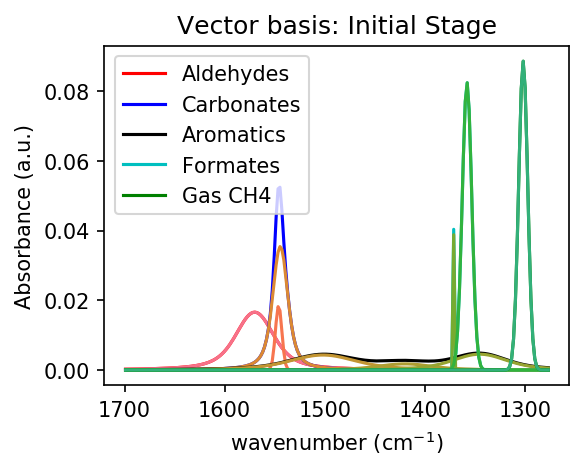

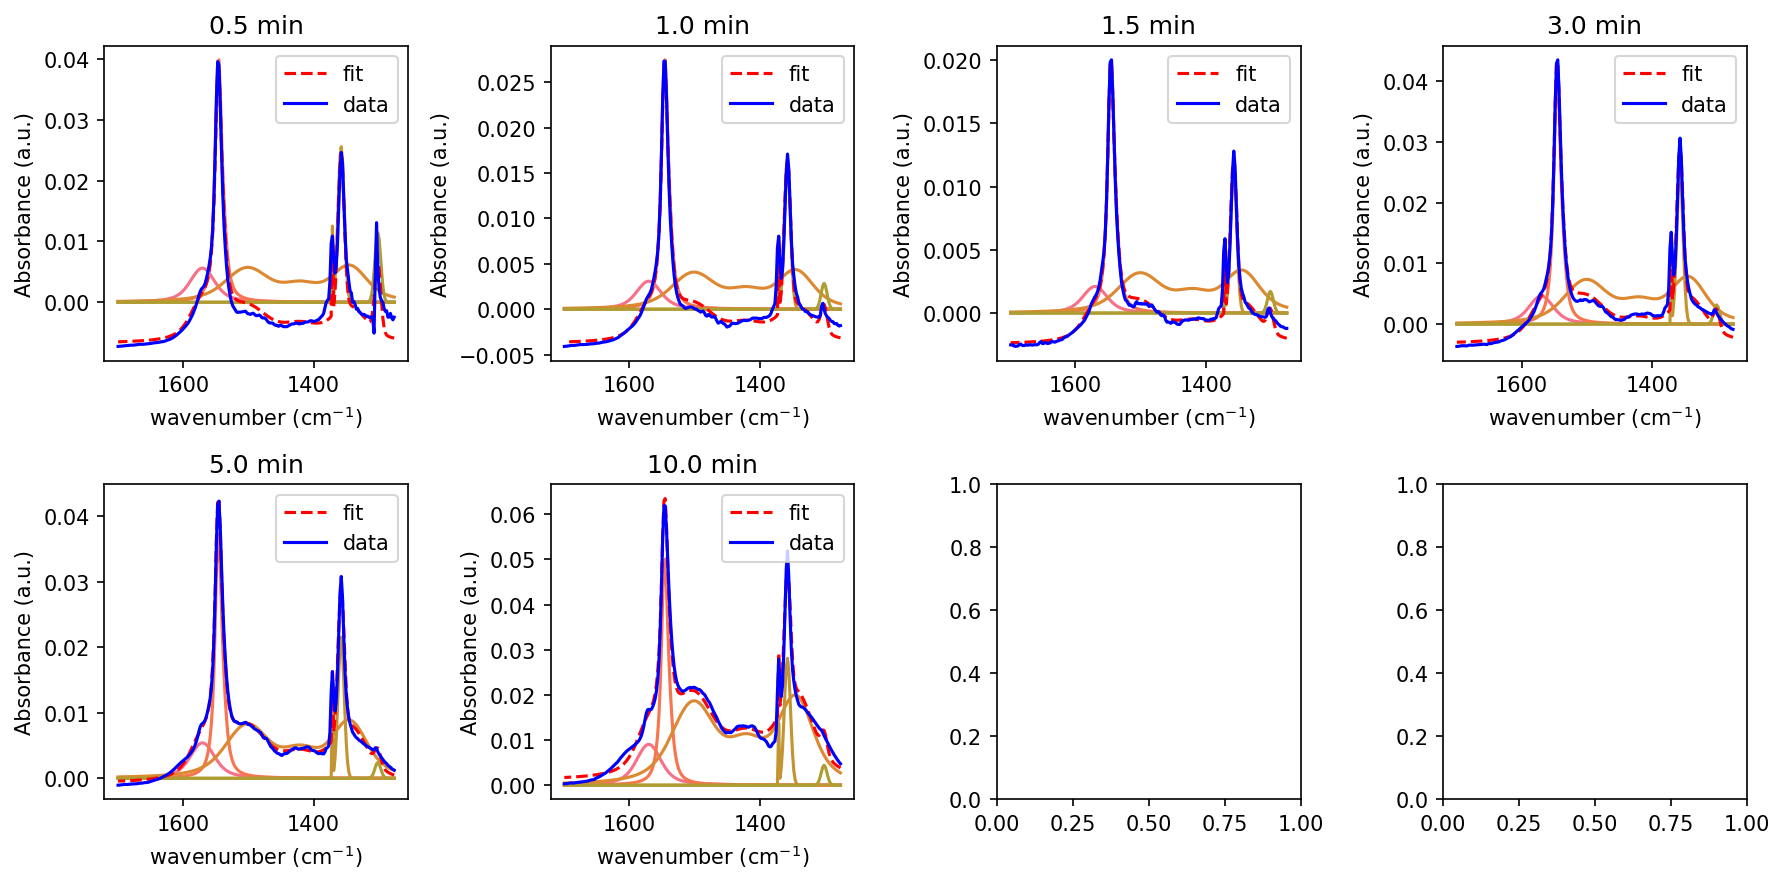

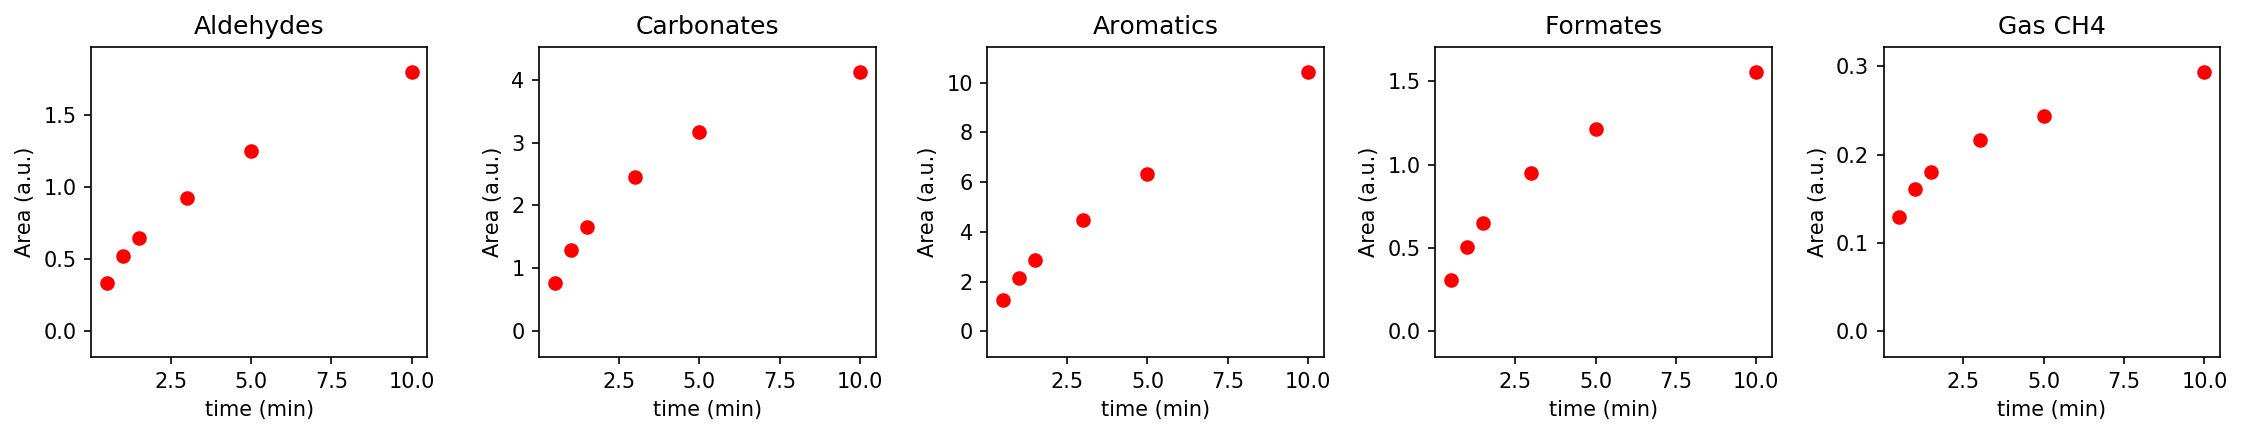

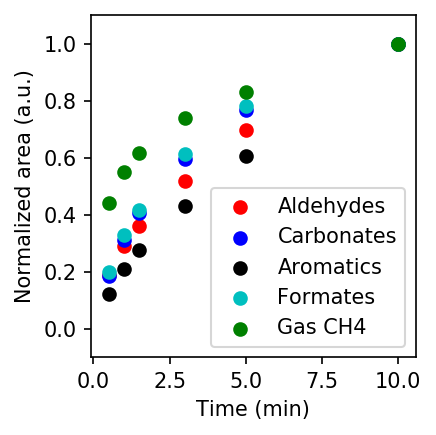

In [237]:
ndata = 6
yhat_CC0 = Generate_data(new_params_CC0,x_CC,Vec_fit_CC0,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format(r2_score(y_CC[:ndata].flatten(), yhat_CC0.flatten())))
Vec_name_CC0 = np.array(['Aldehydes','Carbonates','Aromatics','Formates','Gas CH4'])
Plot_data(new_params_CC0,x_CC,y_CC[:ndata],Vec_fit_CC0,Time[:ndata],Vec_name_CC0,True)

### Fitting the Middle Stage (20,60) min

In [127]:
Vec_CC_IG1 = {'Mus':np.array([1605.1, 1536.8, 1559.5, 1495.7, 1415.0, 1365.2, 1367.2, 1360.3, 1303.9]),
             'Sigmas':np.array([15.0, 3.2,13.85, 11.90, 10.93, 14.42, 2.07, 3.25, 2.37]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':False,
                     'Mus_min':np.array([1595,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.]),
                     'Mus_max':None}
             }

In [128]:
t0 = time.time()
nstart = 6
ndata = 5

fit_params_IG1 = Generate_params_IG(x_CC,Vec_CC_IG1,ndata = ndata)

fitter = Minimizer(loss_func_IG, fit_params_IG1, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_CC_IG1))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 55.30647397041321


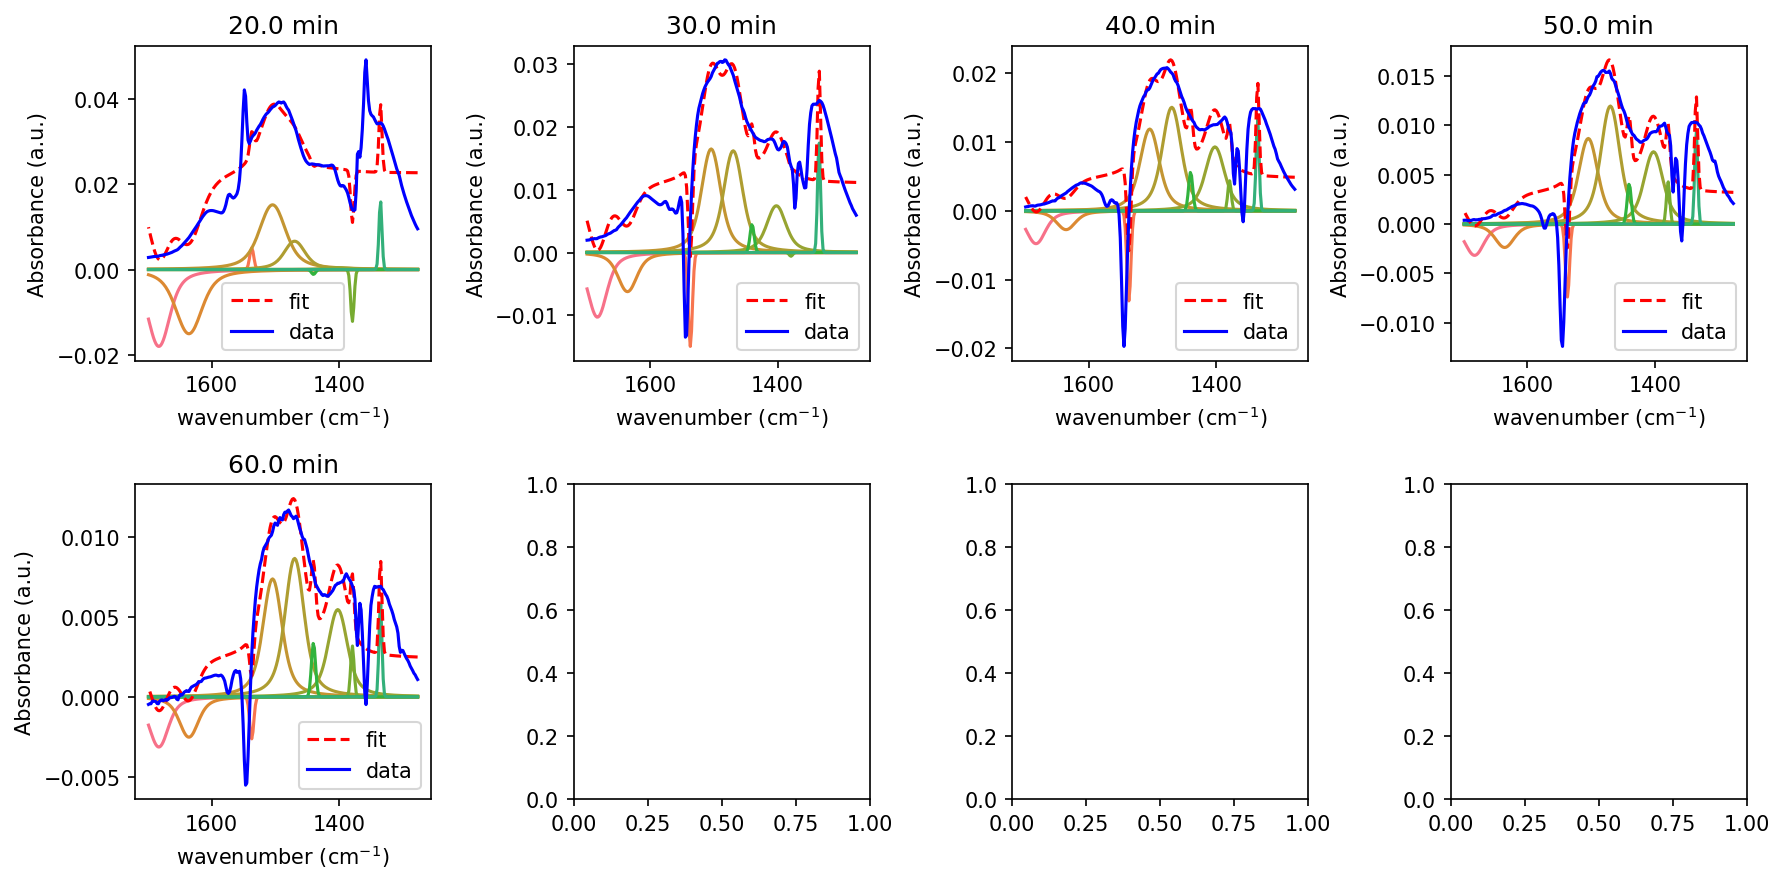

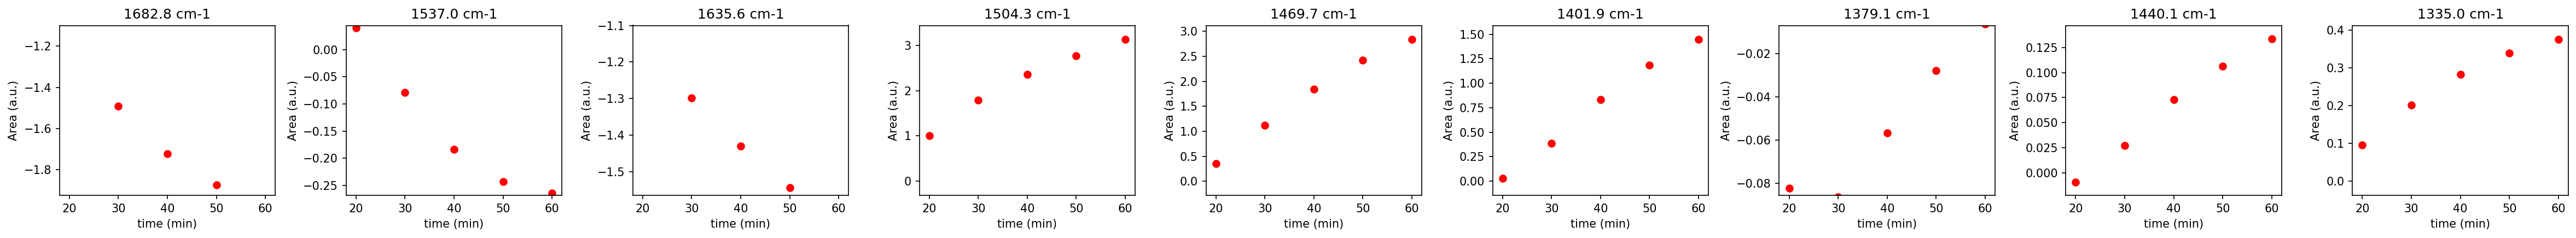

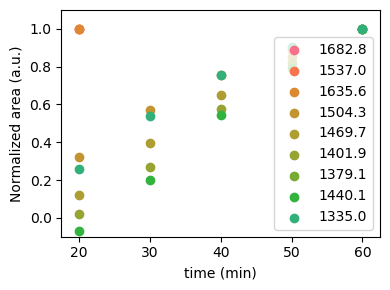

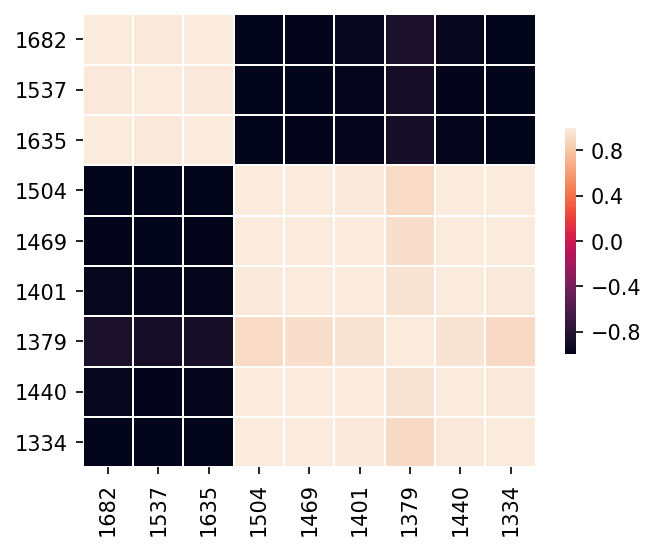

{'Peak Pos': [1682, 1537, 1635, 1504, 1469, 1401, 1379, 1440, 1334],
 'Amps': array([[-1.        ,  0.04064784, -1.        ,  1.        ,  0.34786684,
          0.02970622, -0.08225166, -0.00935854,  0.09600918],
        [-1.49266258, -0.07905299, -1.29825124,  1.78894925,  1.12290693,
          0.38602897, -0.08627402,  0.02705349,  0.20139916],
        [-1.72140762, -0.18406192, -1.42916427,  2.35910033,  1.84467783,
          0.83180829, -0.05666904,  0.07304562,  0.28212738],
        [-1.87353823, -0.24336416, -1.5429565 ,  2.77469207,  2.41770009,
          1.18267832, -0.02776764,  0.10619887,  0.3391333 ],
        [-2.02423703, -0.26445122, -1.66402707,  3.129129  ,  2.83376573,
          1.44495544, -0.00619398,  0.1337745 ,  0.37425489]])}

In [129]:
params_IG1 = result.params
Plot_data_IG(params_IG1,x_CC,y_CC[nstart:nstart+ndata],Vec_CC_IG1,Time[nstart:nstart+ndata],True)

In [182]:
t0 = time.time()
#Vec_fit_CC1['Alphas'] = None
nstart = 6
ndata = 5
Vec_fit_CC1 = Generate_Vec_IG(params_IG1,Vec_IG_struc_CC,ndata)
Vec_fit_CC1['Vec0']['Mus'][0]=1605.
Vec_fit_CC1['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1585],[1605],[0.1],[20],[0]]),
                               'Pos':None}
Vec_fit_CC1['Vec1']['Mus'][1]=1565.
Vec_fit_CC1['Vec1']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1520,1540],[1570,1580],[1.2,1.2],[3.5,15],[0.001,-10]]),
                               'Pos':None}
Vec_fit_CC1['Vec2']['Mus'][0] = 1480.
Vec_fit_CC1['Vec2']['Mus'][1] = 1395.
Vec_fit_CC1['Vec2']['Mus'][2] = 1340.
Vec_fit_CC1['Vec2']['Lims'] = {'Peaks':np.array([0,1,2]),
                               'Specs':np.array([[1400,1370,1300],
                                                 [1510,1410,1400],
                                                 [5,5,5.],
                                                 [25,18,18],
                                                 [0,0,0]]),
                                'Pos':None}
Vec_fit_CC1['Vec3']['Mus'] = np.array([1361,1370])
Vec_fit_CC1['Vec3']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1348,1360],[1362,1375],[0.5,0.5],[2.5,2.5],[-1,-1]]),
                               'Pos':None}
Vec_fit_CC1['Vec4']['Mus'] = np.array([1305])
Vec_fit_CC1['Vec4']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1300],[1310],[0.1],[4.5],[-10]]),
                               'Pos':None}

fit_params_CC1 = Generate_params(x_CC,Vec_fit_CC1,ndata =ndata)
fitter = Minimizer(loss_func, fit_params_CC1, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_fit_CC1))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 11.561488911113608 0.1 20.0
0 1605.0 1585.0 1605.0
1 3.2 1.2 3.5
1 1537.0 1532.0 1542.0
1 13.85 1.2 15.0
1 1565.0 1540.0 1580.0
2 13.746435710718355 5.0 25.0
2 1480.0 1450.0 1510.0
2 10.93 5.0 18.0
2 1395.0 1370.0 1410.0
2 14.42 5.0 18.0
2 1340.0 1310.0 1370.0
3 2.6909985088966693 0.5 2.5
3 1361 1356.0 1362.0
3 3.25 0.5 2.5
3 1370 1365.0 1375.0
4 2.37 0.1 4.5
4 1305 1300.0 1310.0
The time cost is: 325.3699560165405


In [183]:
new_params_CC1 = result.params

The R2 score of the fit is: 0.97
Plotting.....


Carbonyls  Aldehydes  Aromatics  Formates   Gas CH4
0   0.745874   0.360070   7.933516  0.222188  0.061484
1   1.250431  -0.071875  14.108445  0.135260  0.047583
2   1.388509  -0.561835  18.374397  0.003678  0.012570
3   1.407621  -0.891051  21.497666 -0.095435 -0.009515
4   1.462260  -1.062351  24.027055 -0.159964 -0.054197

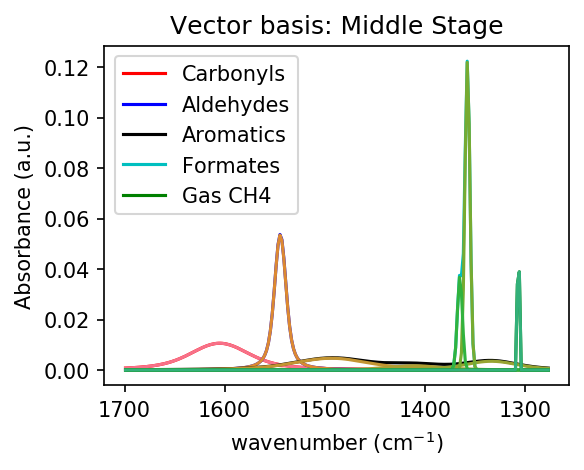

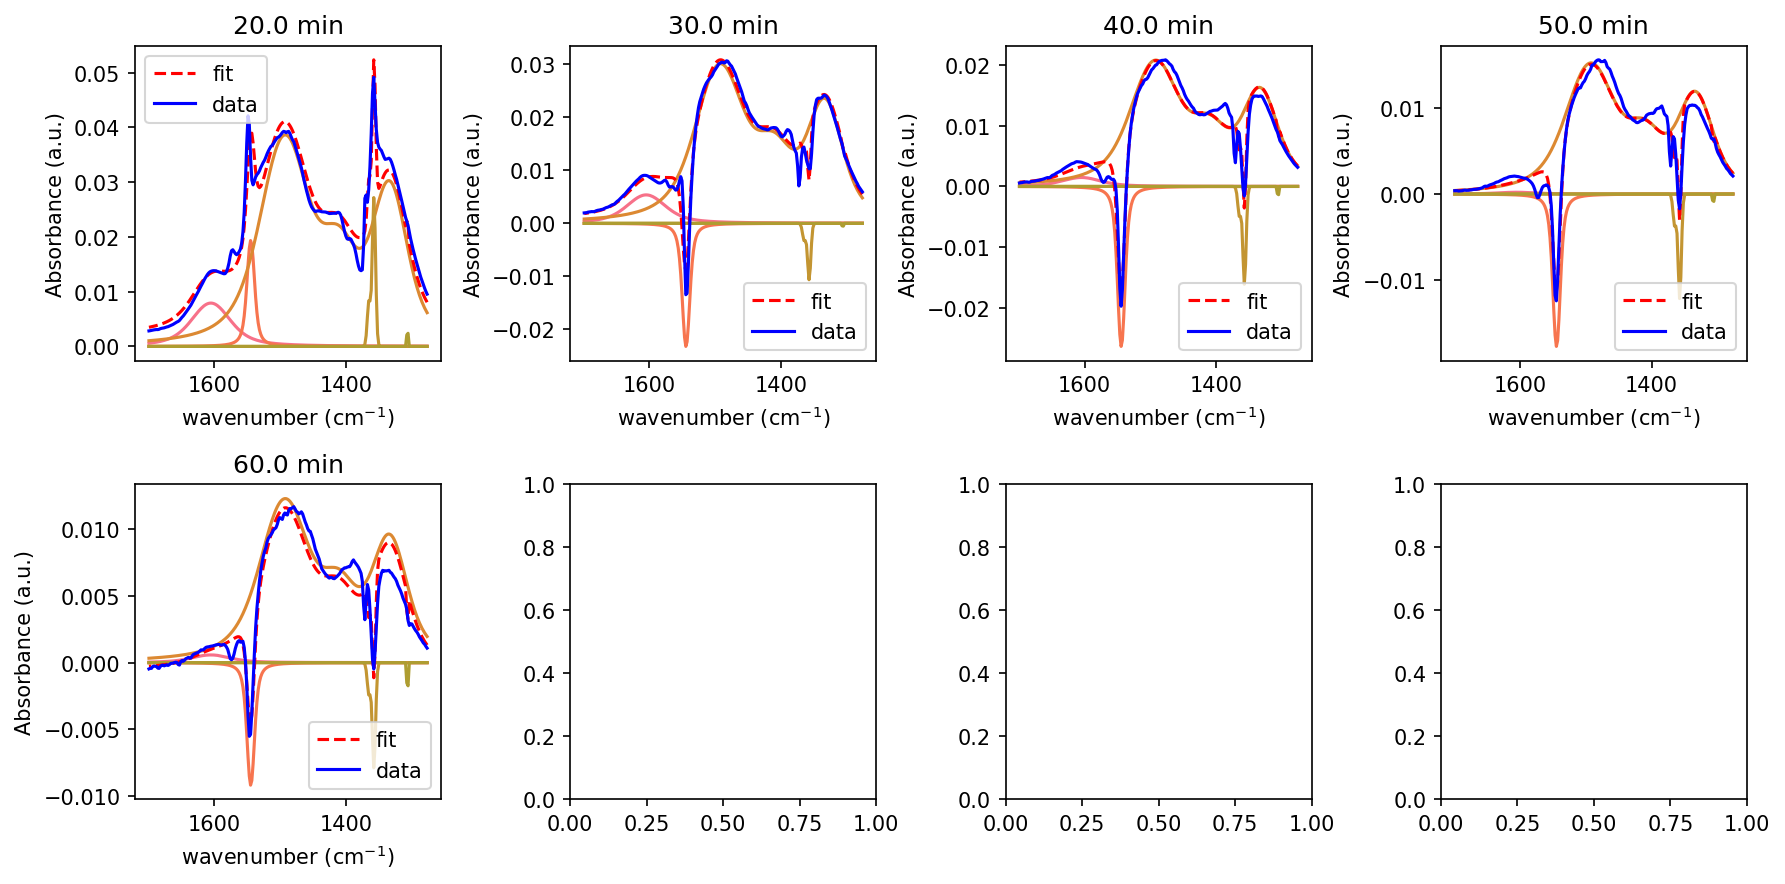

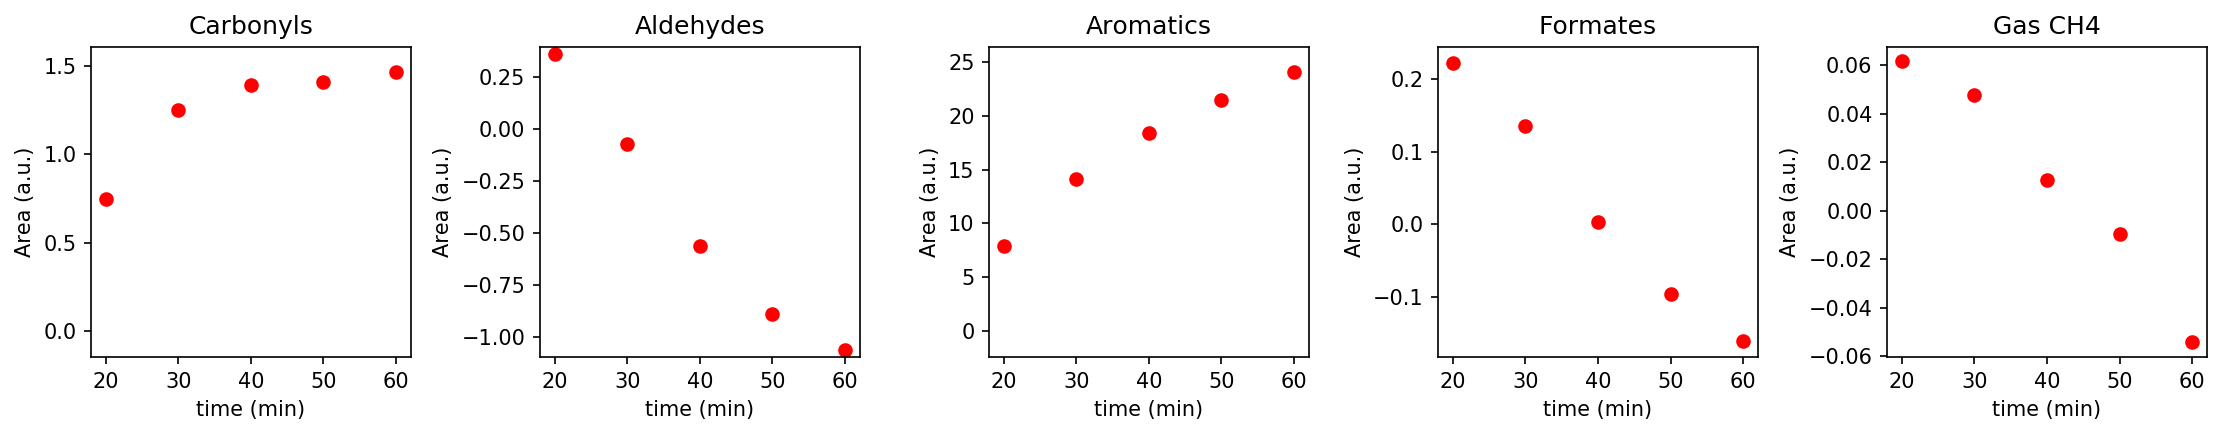

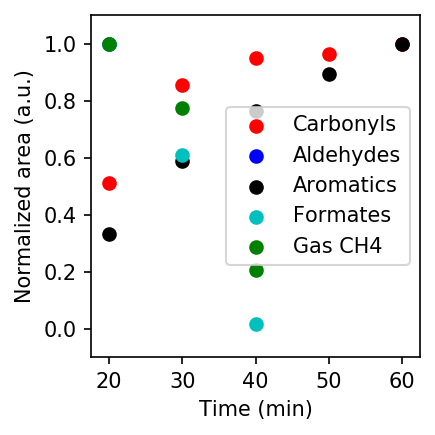

In [236]:
nstart = 6
ndata = 5
yhat_CC1 = Generate_data(new_params_CC1,x_CC,Vec_fit_CC1,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[nstart:nstart+ndata].flatten(), yhat_CC1.flatten())))
Plot_data(new_params_CC1,x_CC,y_CC[nstart:nstart+ndata],Vec_fit_CC1,Time[nstart:nstart+ndata],Vec_name_CC0,True)

### Fitting the Final Stage (120,720) min

In [117]:
Vec_IG_CC2 = {'Mus':np.array([1600, 1544.8, 1541.7, 1473.6, 1386, 1352, 1369.1, 1357.9, 1303.9]),
             'Sigmas':np.array([15.9, 4.4,18.7, 20, 18, 8.7, 2.4, 4, 2.37]),
             'Types':np.array([1,0,1,1,1,1,0,0,0]),
             'Fixed':None,#np.array([0,0,0,0,0,0,0,1,1,1]),
             'Lims':{'Positive':False,
                     'Mus_min':np.array([1595,1537., 1500., 1460, 1370,1330, 1300, 1330, 1300.]),
                     'Mus_max':np.array([1615,1580, 1580., 1500, 1400, 1370, 1400, 1400, 1310.])}
             }


In [185]:
t0 = time.time()
nstart = 11
ndata = 7
fit_params_IG2 = Generate_params_IG(x_CC,Vec_IG_CC2,ndata = ndata)
fitter = Minimizer(loss_func_IG, fit_params_IG2, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_IG_CC2))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 96.29201984405518


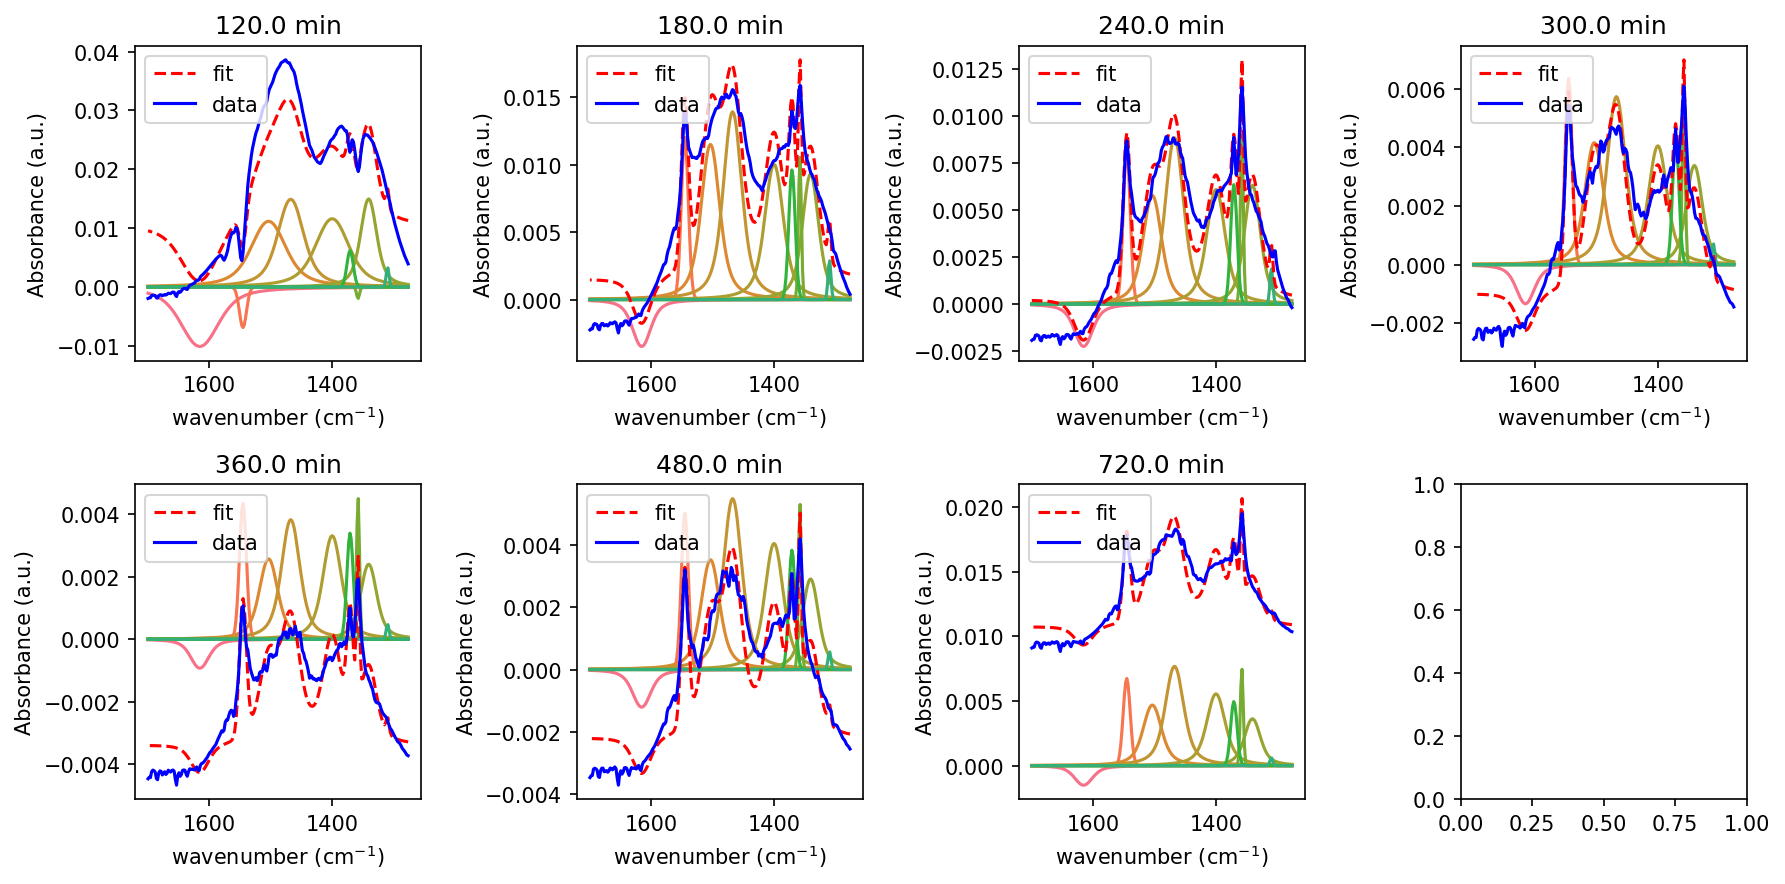

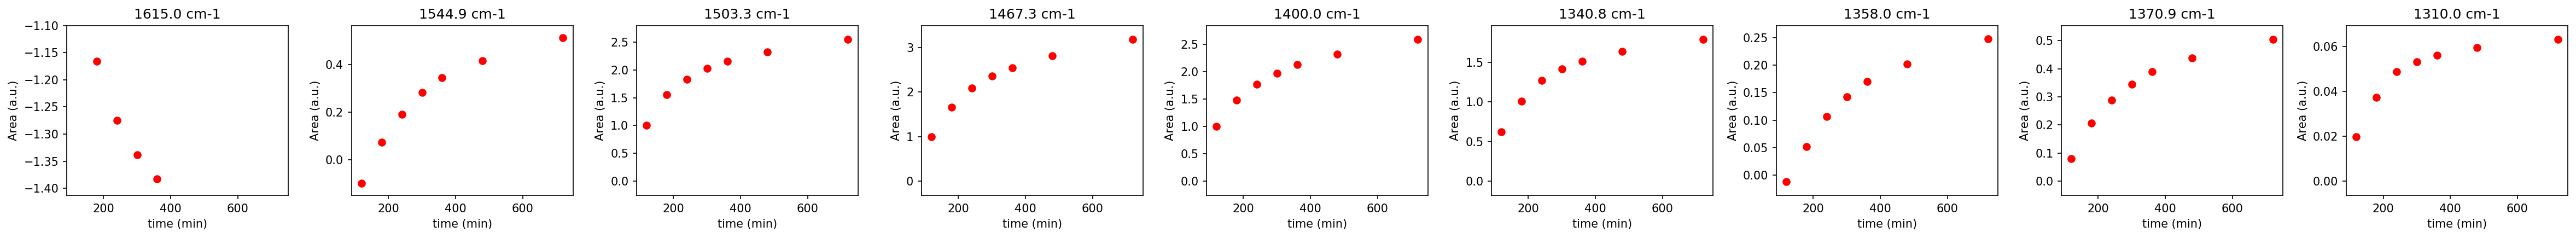

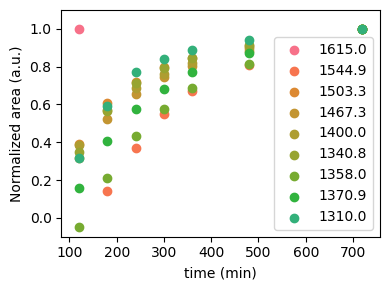

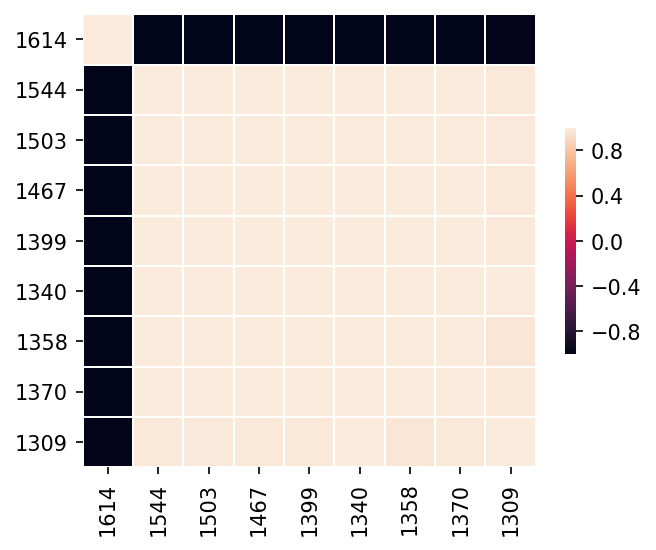

{'Peak Pos': [1614, 1544, 1503, 1467, 1399, 1340, 1358, 1370, 1309],
 'Amps': array([[-1.        , -0.0988123 ,  1.        ,  1.        ,  1.        ,
          0.62421008, -0.011756  ,  0.08070857,  0.01987964],
        [-1.16649195,  0.073585  ,  1.55116437,  1.66694447,  1.48036171,
          1.01189443,  0.05232157,  0.20604443,  0.03742021],
        [-1.27461163,  0.1901744 ,  1.82791374,  2.09092484,  1.77208842,
          1.27505518,  0.10686814,  0.28884305,  0.04883366],
        [-1.33845171,  0.28131365,  2.02738535,  2.3656227 ,  1.96636083,
          1.41613852,  0.1422482 ,  0.34468843,  0.05314117],
        [-1.38295984,  0.34378224,  2.15083213,  2.54920701,  2.12528219,
          1.51630217,  0.16965623,  0.38901563,  0.05598712],
        [-1.44076678,  0.41556856,  2.31954389,  2.81182303,  2.31901344,
          1.63740623,  0.20184566,  0.43893046,  0.05942503],
        [-1.51299717,  0.51231964,  2.54429946,  3.17997518,  2.585175  ,
          1.78862305,  0.24716195

In [186]:
params_IG2 = result.params
Plot_data_IG(params_IG2,x_CC,y_CC[nstart:nstart+ndata],Vec_IG_CC2,Time[nstart:nstart+ndata],True)

In [251]:
Vec_fit_CC2 = Generate_Vec_IG(params_IG2,Vec_IG_struc_CC,ndata)

In [263]:
t0 = time.time()
nstart = 11
ndata = 7
Vec_fit_CC2['Vec1']['Mus'][1]=1550.2
Vec_fit_CC2['Vec2']['Mus'][0]=1482.6
Vec_fit_CC2['Vec2']['Mus'][1]=1385.2
Vec_fit_CC2['Vec2']['Mus'][2]=1325.6
Vec_fit_CC2['Vec3']['Mus'][0]=1372.
Vec_fit_CC2['Vec3']['Mus'][1]=1357
Vec_fit_CC2['Alphas'] = None
Vec_fit_CC2['Vec0']['Lims'] = {'Peaks':np.array([0]),
                               'Specs':np.array([[1590],[1610],[10],[20],[-.2]]),
                              'Pos':None}
Vec_fit_CC2['Vec1']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1535,1535],[1585,1585],[0.1,0.1],[5,25],[-1,-1]]),
                              'Pos':None}
Vec_fit_CC1['Vec2']['Lims'] = {'Peaks':np.array([0,1,2]),
                               'Specs':np.array([[1400,1360,1300],
                                                 [1520,1420,1400],
                                                 [15,5,5.],
                                                 [28,20,25],
                                                 [0,0,0]]),
                                'Pos':None}
Vec_fit_CC2['Vec3']['Lims'] = {'Peaks':np.array([0,1]),
                               'Specs':np.array([[1355,1355],[1375,1375],[1.2,1.2],[5,5],[-0.02,-0.02]]),
                              'Pos':None}

fit_params_CC2 = Generate_params(x_CC,Vec_fit_CC2,ndata=ndata)

fitter = Minimizer(loss_func, fit_params_CC2, fcn_args=(x_CC, y_CC[nstart:nstart+ndata], Vec_fit_CC0))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

0 20.66999999994482 10.0 20.0
0 1614.9999998942737 1590.0 1610.0
1 5.719999999999996 0.7199999999999962 5.0
1 1544.910096157896 1539.910096157896 1549.910096157896
1 18.7 3.6999999999999993 25.0
1 1550.2 1535.0 1580.2
2 14.000000000003746 0.1 29.000000000003745
2 1482.6 1452.6 1512.6
2 18.0 3.0 33.0
2 1385.2 1355.2 1415.2
2 8.7 0.1 23.7
2 1325.6 1295.6 1355.6
3 2.4 1.2 5.0
3 1372.0 1367.0 1375.0
3 5.199999999999999 1.2 5.0
3 1357.0 1355.0 1362.0
4 2.37 0.1 7.37
4 1309.9999999672698 1304.9999999672698 1314.9999999672698
The time cost is: 4.220447778701782


In [266]:
new_params_CC2 = result.params

The R2 score of the fit is: 0.98
Plotting.....


Aldehydes  Carbonates  Aromatics  Formates   Gas CH4
0  -0.199992    0.471611   7.253531 -0.036554 -0.133672
1  -0.352249    1.143339  10.467851  0.006973 -0.192440
2  -0.468154    1.506203  12.367123  0.051703 -0.224497
3  -0.520198    1.823177  13.632498  0.081130 -0.250450
4  -0.563787    2.022631  14.492262  0.108168 -0.268292
5  -0.602928    2.255680  15.671443  0.132276 -0.295102
6  -0.645371    2.560635  17.278569  0.162759 -0.335176

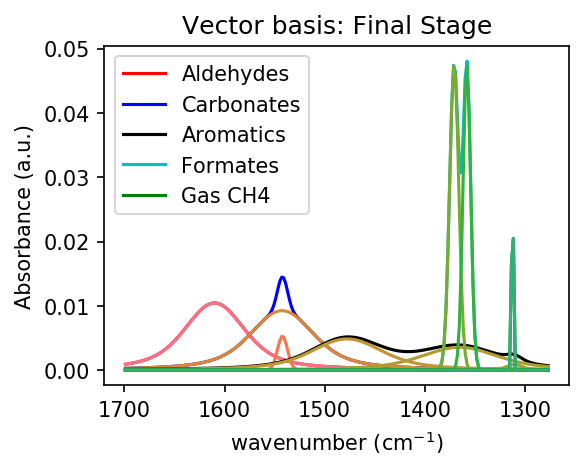

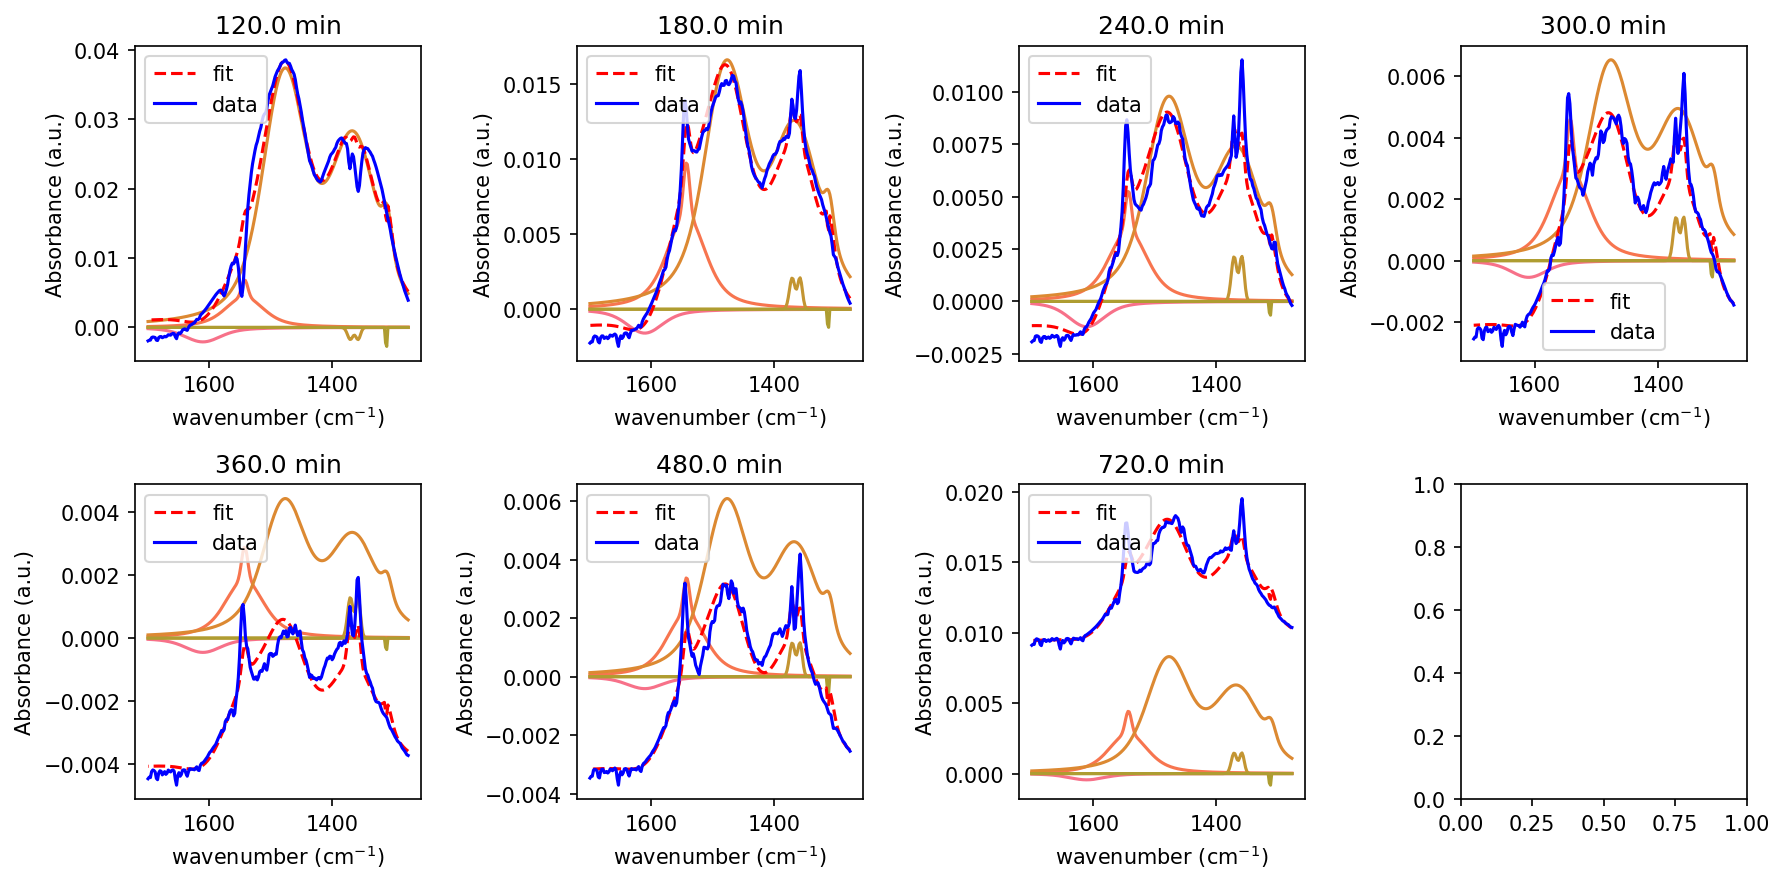

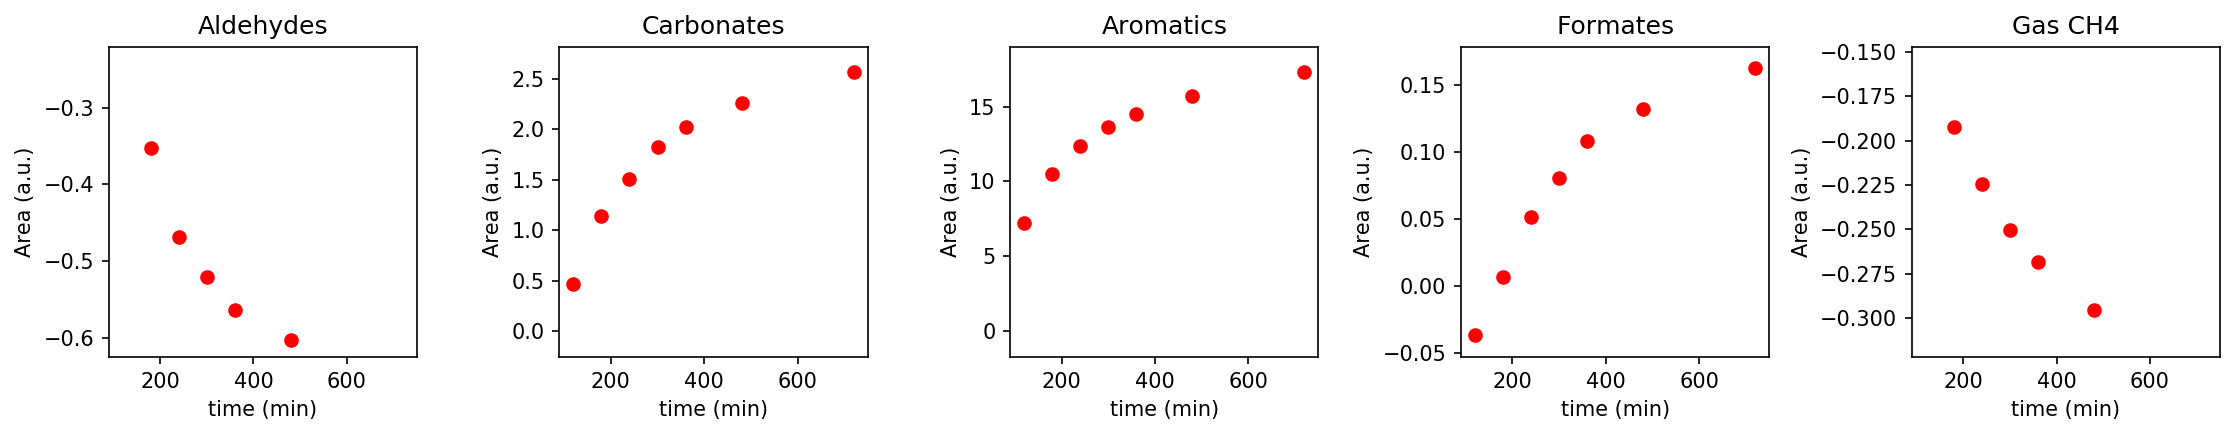

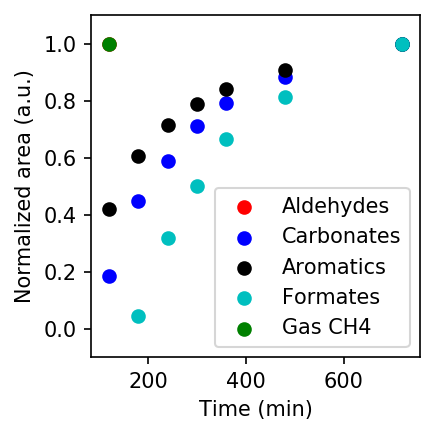

In [267]:
yhat_CC2 = Generate_data(new_params_CC2,x_CC,Vec_fit_CC2,ndata=ndata)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CC[nstart:nstart+ndata].flatten(), yhat_CC2.flatten())))
Plot_data(new_params_CC2,x_CC,y_CC[nstart:nstart+ndata],Vec_fit_CC2,Time[nstart:nstart+ndata],Vec_name_CC0,True)

### Combine the three Stages Together

Now, we want to evaluate the evolution of different species over the entire experiment period through combining the three stages together. 

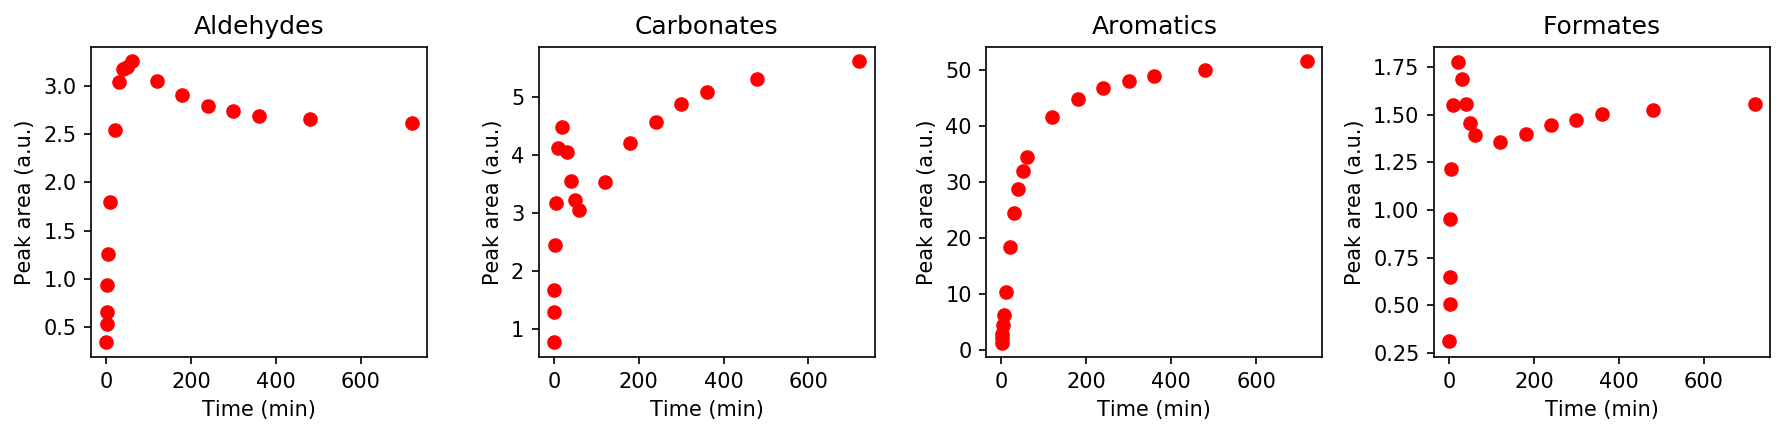

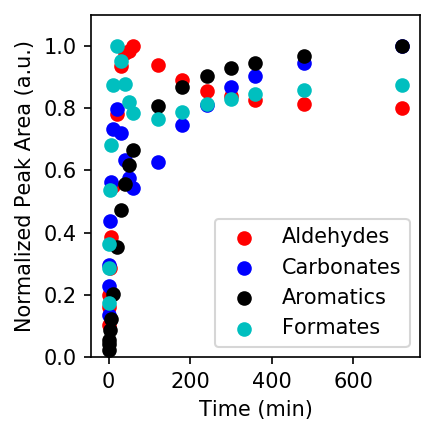

In [268]:
Param_com = {'Params': (new_params_CC0,new_params_CC1,new_params_CC2) ,
            'Lens':np.array([6,5,7])}
Param_com_IG = {'Params': (params_IG,params_IG1,params_IG2) ,
            'Lens':np.array([6,5,7])}

#Plot_com_data_IG(Param_com_IG,Vec_IG_CC0,Time,True)
data_CC = Plot_com_data(Param_com,Vec_IG_struc_CC,Time,Vec_name_CC0,True)

In [105]:
for i in range(3):
    Print_var(Param_com['Params'][i],np.array(['Carbonyls','Carbonates','Aromatics','Formates','Gas CH4\t']),Vec_IG_struc_CC)

Species		Type		Peak (cm-1)	Variance (cm-1)	
Carbonyls	Voigt		1570.0		12.6
Carbonates	Gaussian	1546.0		3.2
		Voigt		1544.4		5.0
Aromatics	Voigt		1501.9		22.0
		Voigt		1420.0		18.0
		Voigt		1345.1		18.0
Formates	Gaussian	1371.1		0.2
		Gaussian	1357.9		4.7
Gas CH4		Gaussian	1301.7		4.5
Species		Type		Peak (cm-1)	Variance (cm-1)	
Carbonyls	Voigt		1605.0		19.9
Carbonates	Gaussian	1532.4		2.7
		Voigt		1544.4		3.7
Aromatics	Voigt		1502.3		22.6
		Voigt		1439.7		25.0
		Voigt		1337.2		21.1
Formates	Gaussian	1356.0		1.1
		Gaussian	1360.0		3.0
Gas CH4		Gaussian	1306.7		4.5
Species		Type		Peak (cm-1)	Variance (cm-1)	
Carbonyls	Voigt		1610.0		15.0
Carbonates	Gaussian	1545.2		6.5
		Voigt		1525.0		10.0
Aromatics	Voigt		1486.0		29.0
		Voigt		1371.1		27.7
		Voigt		1321.2		13.2
Formates	Gaussian	1370.5		4.9
		Gaussian	1357.6		3.5
Gas CH4		Gaussian	1315.0		7.2


## Fitting the 1000 - 1150 cm$^{-1}$ region

This region contains charistic peaks from C-O speices. 

In [221]:
Vec_IG_CO = {'Mus':np.array([1059.8, 1105.9]),
          'Sigmas':np.array([15.8,7.6]),
          'Types':np.array([1,1]),
          'Lims':None}

In [222]:
t0 = time.time()
fit_params_IG_CO = Generate_params_IG(x_CO,Vec_IG_CO,ndata =18)

fitter = Minimizer(loss_func_IG, fit_params_IG_CO, fcn_args=(x_CO, y_CO, Vec_IG_CO))
result = fitter.minimize(method='leastsq')
t1 = time.time() 

print('The time cost is:',t1-t0)

The time cost is: 4.42953896522522


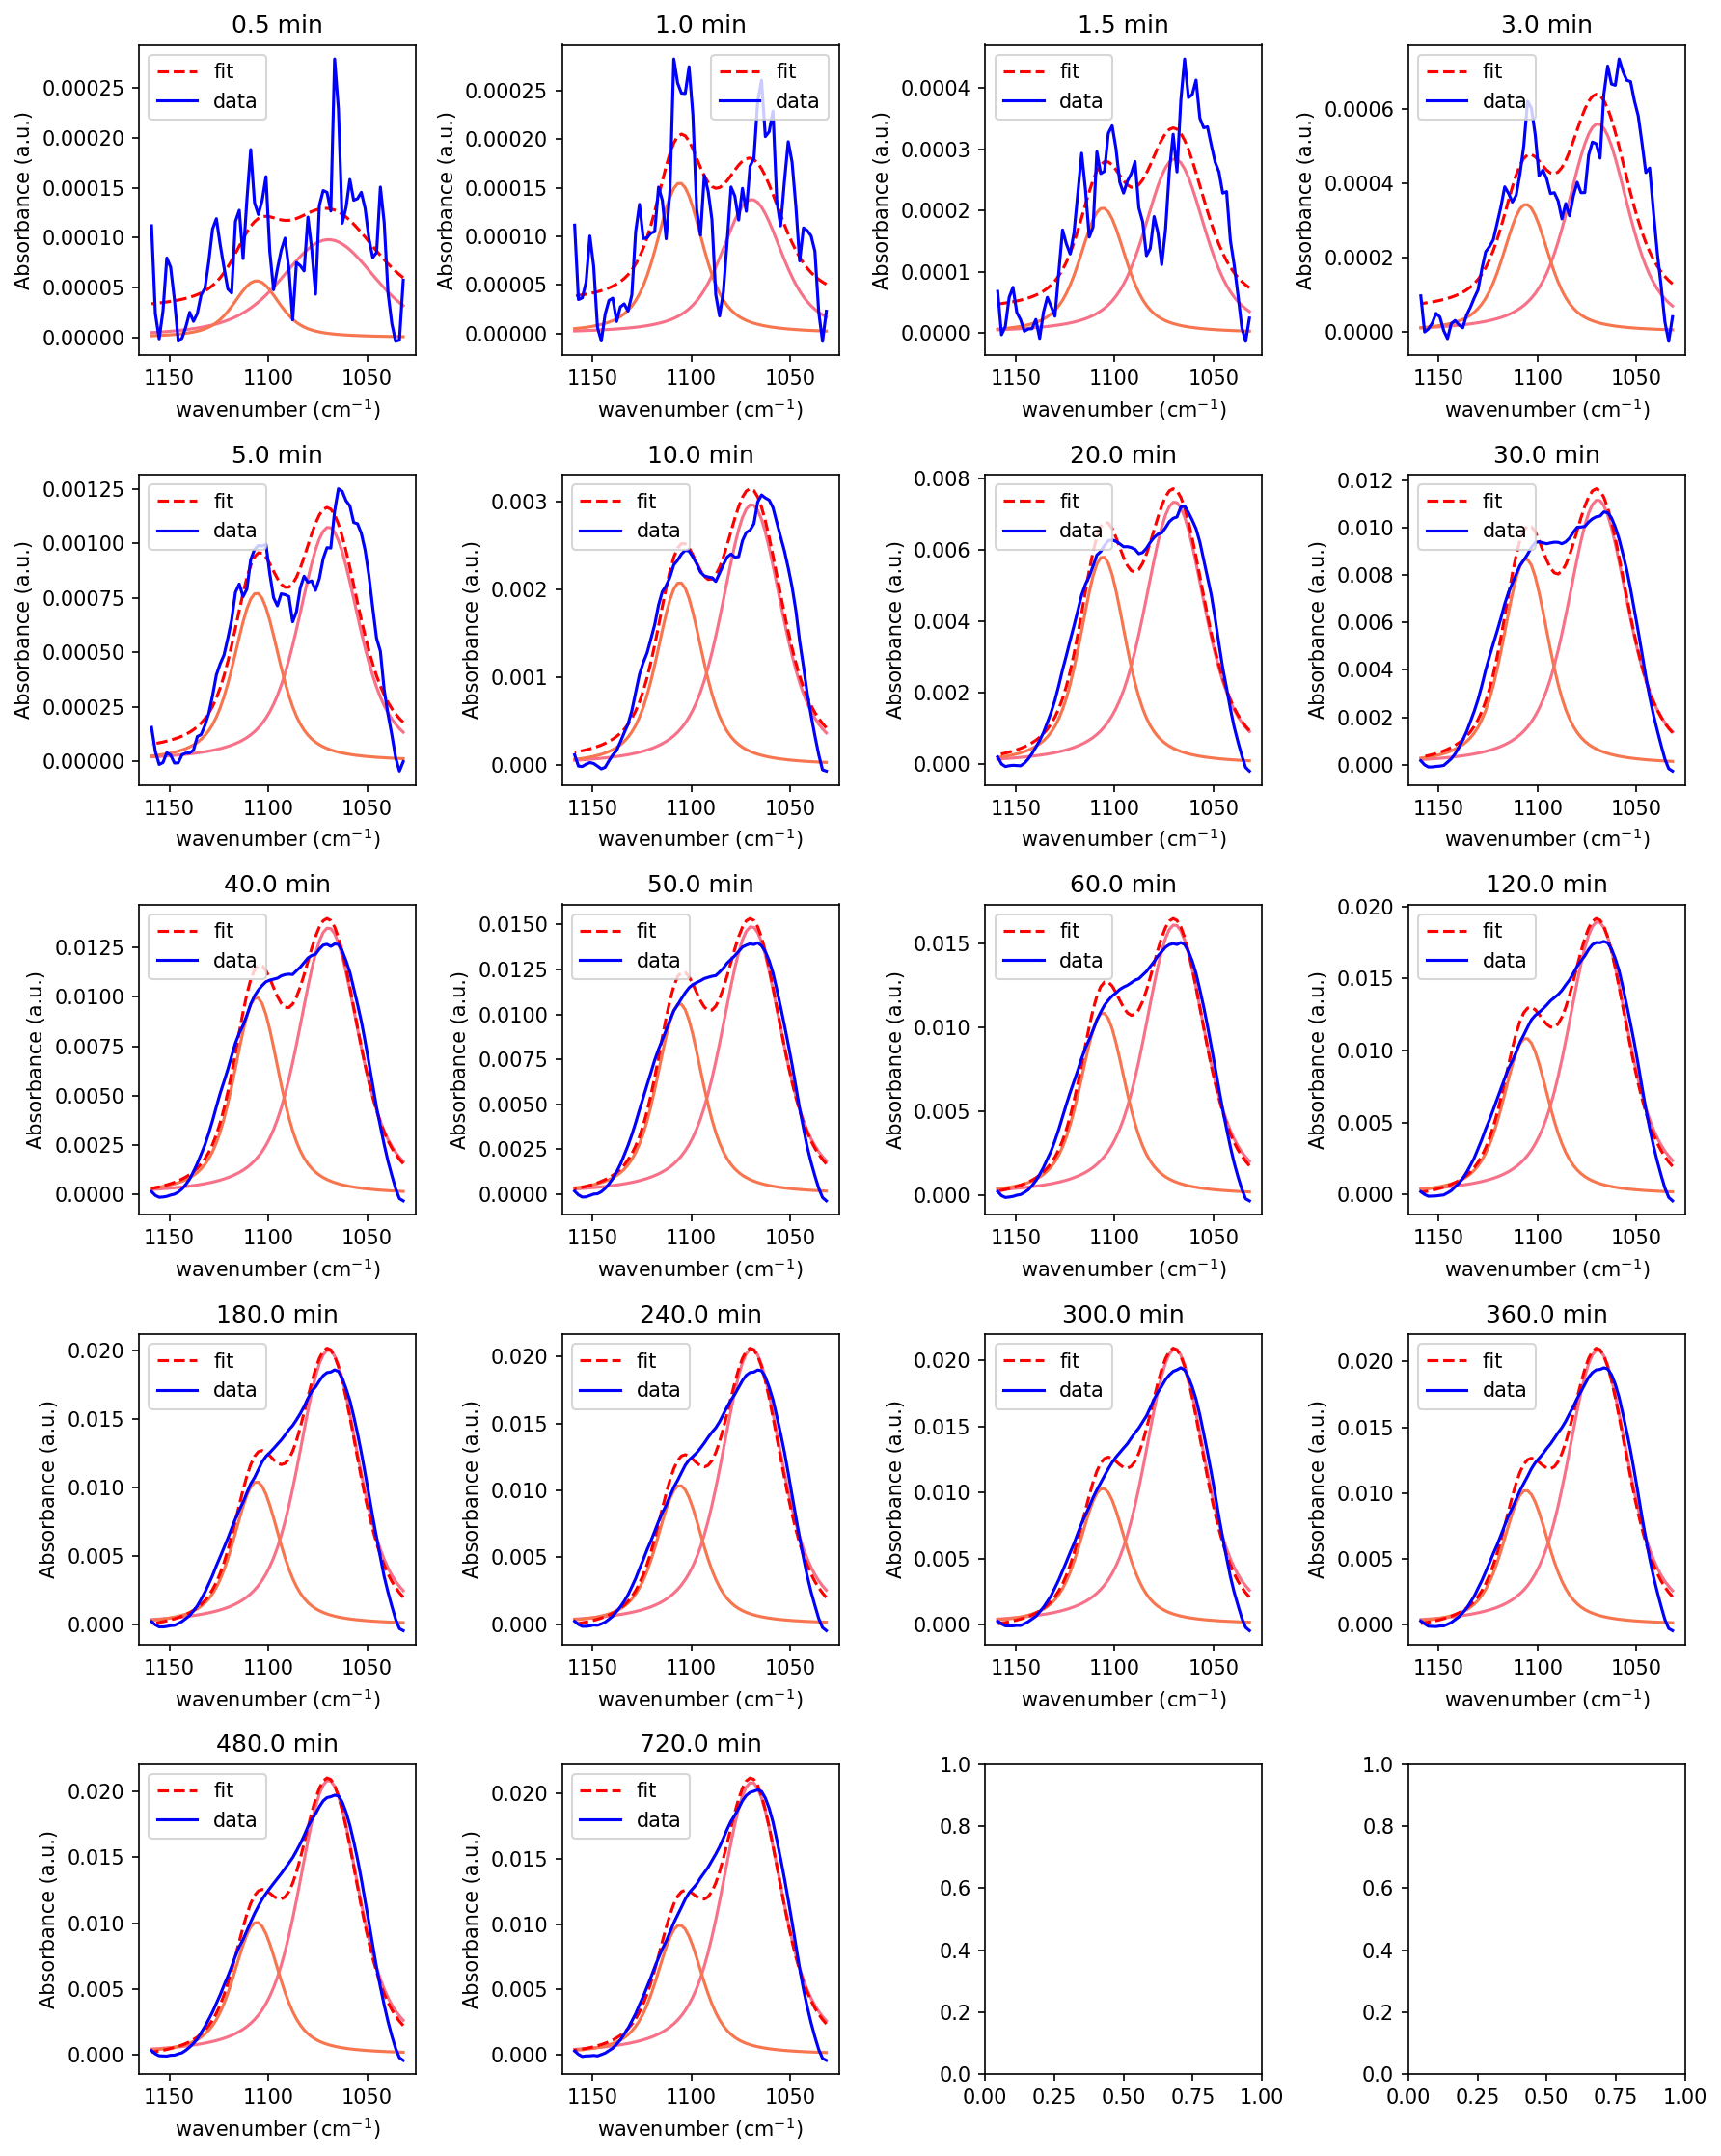

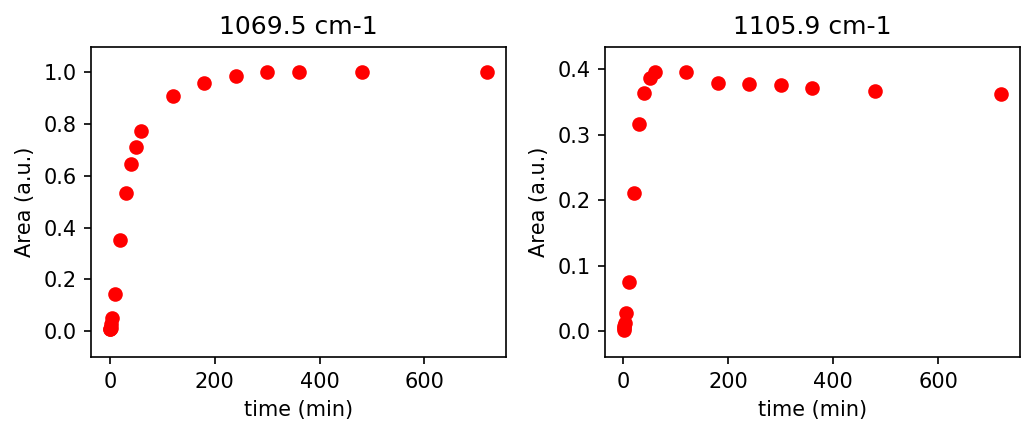

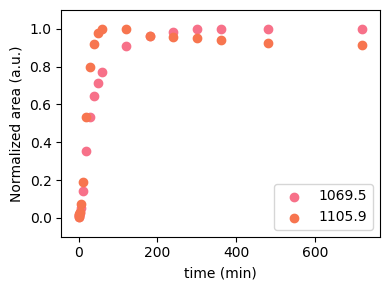

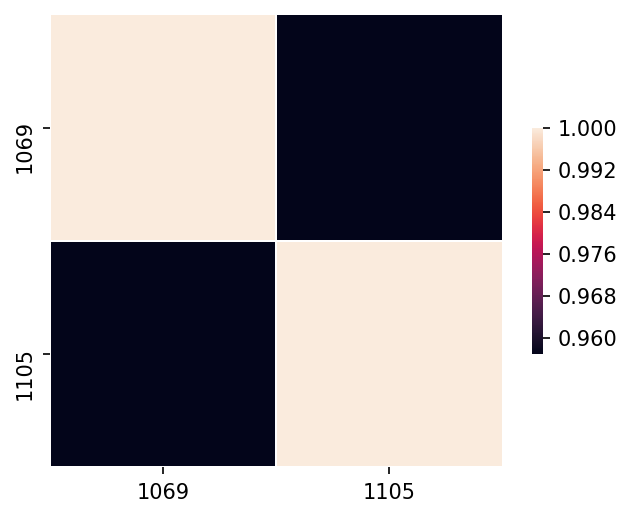

{'Peak Pos': [1069, 1105], 'Amps': array([[0.00741744, 0.0020672 ],
        [0.00661039, 0.00564422],
        [0.01361727, 0.00743835],
        [0.02686097, 0.01251558],
        [0.05150565, 0.02813327],
        [0.14214465, 0.07574411],
        [0.35217374, 0.21176589],
        [0.53504719, 0.31624401],
        [0.6467062 , 0.36335493],
        [0.71337981, 0.38603066],
        [0.77208586, 0.39536933],
        [0.90824615, 0.39521518],
        [0.9597808 , 0.37972228],
        [0.98472743, 0.37765381],
        [0.99999911, 0.37570059],
        [1.        , 0.37199941],
        [1.        , 0.36644832],
        [0.99999998, 0.36166317]])}

In [223]:
params_IG_CO = result.params
Plot_data_IG(params_IG_CO,x_CO,y_CO,Vec_IG_CO,Time,False)

In [224]:
Vec_IG_struc_CO = {'Peaks':[[0],[1]],'Types':[[1],[1]]}
Vec_fit_CO = Generate_Vec_IG(params_IG_CO,Vec_IG_struc_CO,18)

In [225]:
t0 = time.time()
fit_params_CO = Generate_params(x_CO,Vec_fit_CO,ndata = 18)

fitter = Minimizer(loss_func, fit_params_CO, fcn_args=(x_CO, y_CO, Vec_fit_CO))
result = fitter.minimize(method='leastsq')
t1 = time.time()

print('The time cost is:',t1-t0)

0 15.8 0.8000000000000007 30.8
0 1069.5173249699237 1039.5173249699237 1099.5173249699237
1 7.6 0.1 22.6
1 1105.9 1075.9 1135.9
The time cost is: 2.769890785217285


In [226]:
new_params_CO = result.params

The R2 score of the fit is: 1.00
Plotting.....


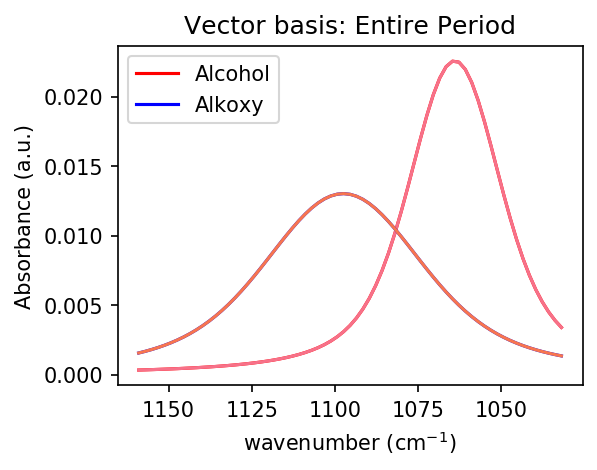

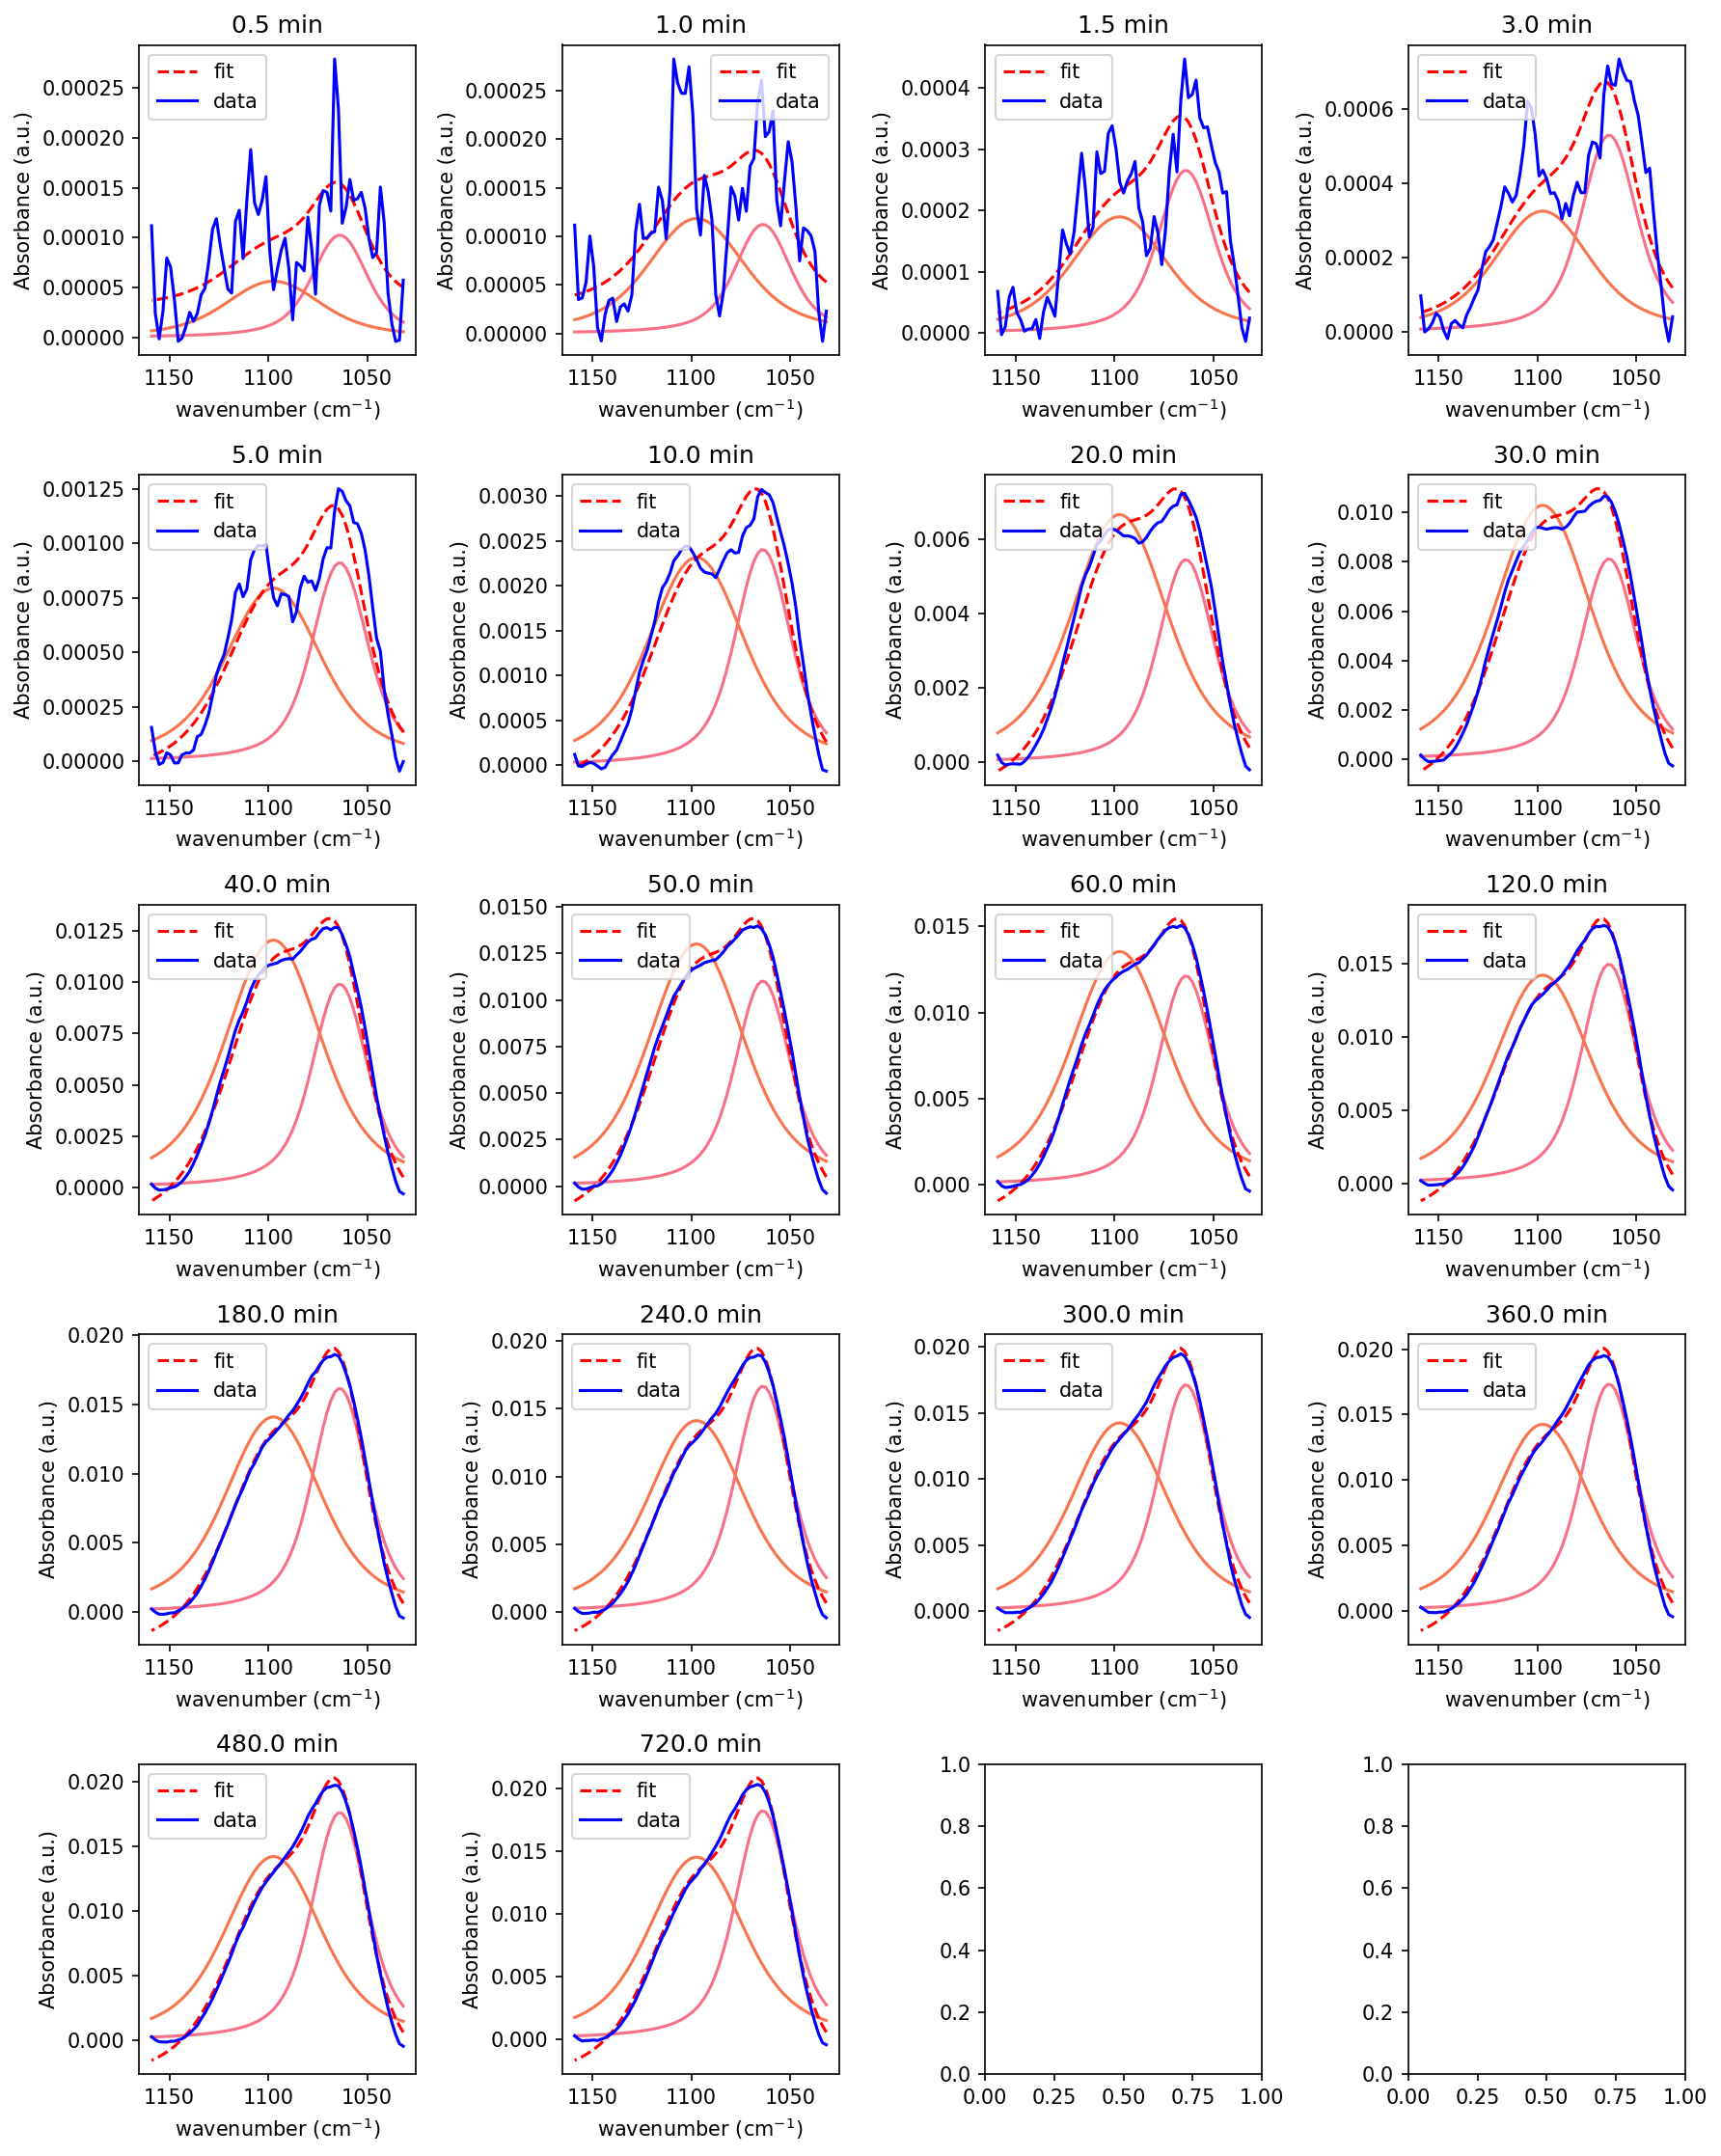

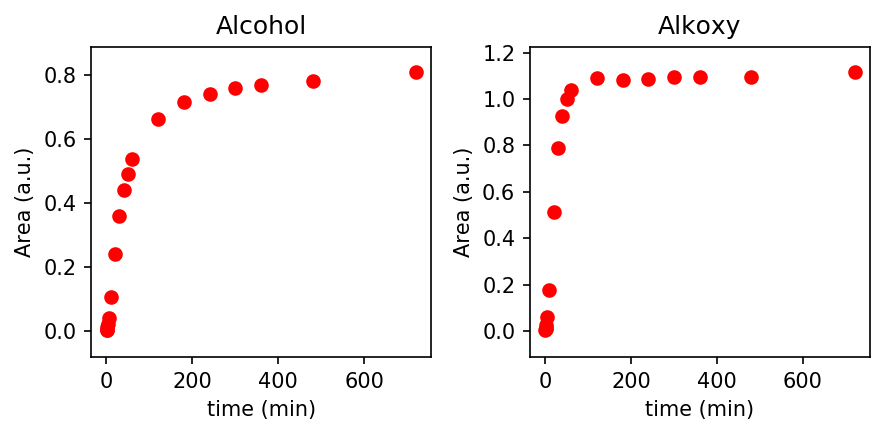

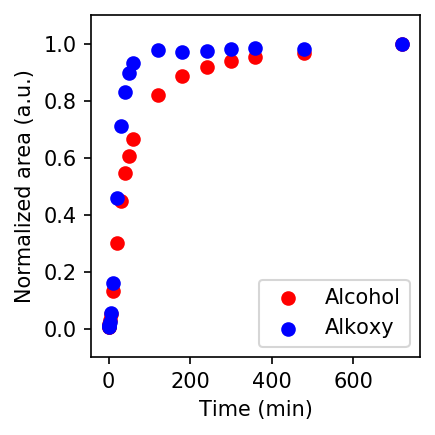

In [227]:
Vec_name_CO = ['Alcohol','Alkoxy']
yhat_CO = Generate_data(new_params_CO,x_CO,Vec_fit_CO,ndata=18)
print('The R2 score of the fit is: {:.2f}'.format( r2_score(y_CO.flatten(), yhat_CO.flatten())))
data_CO = Plot_data(new_params_CO,x_CO,y_CO,Vec_fit_CO,Time,Vec_name_CO,False)

In [228]:
Print_var(new_params_CO,np.array(['Alcohol','Alkoxy']),Vec_IG_struc_CO)

Species		Type		Peak (cm-1)	Variance (cm-1)	
Alcohol	Voigt		1063.8		9.2
Alkoxy	Voigt		1097.4		16.0


# Summary of results

Finally, we want to summarized what we have leanrt so far. A set of plots summarizing the evolution of different surface species is demonstrated below. A table containing all the parameters of peaks at different stages are also listed. 

In [269]:
Final_combined_params = {'CH': data_CH,
                         'CC': data_CC,
                         'CO': data_CO,
                         'Time':pd.DataFrame(Time,columns=['Time'])}
Final_list = [[1,3,5],[4],[2,7,8]]
Plot_name = ['Formates and Carbonates','Aromatics','Aldehydes and Alkoxys']

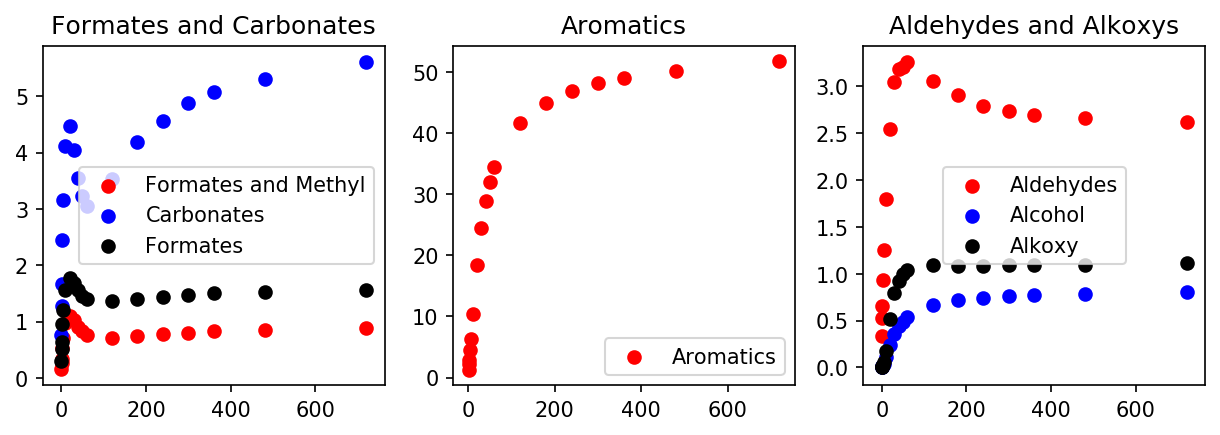

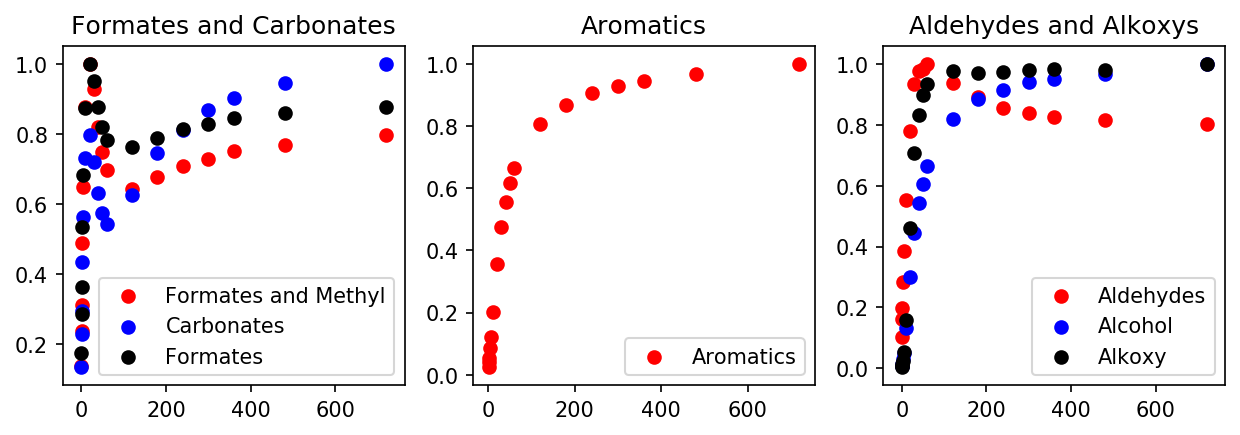

In [270]:
Final_plot(Final_combined_params, Final_list, Plot_name)

In [271]:
Vec_assign = np.array([['Asy C-H','Asy C-H', 'Sym C-H', 'Sym C-H']])
Vec_assign_CC = np.array([['Alde C=O'],['O-C-O','Carbonyl'],
                          ['Aro1', 'Aro2', 'Aro3'],['Sym C=O','Asym C=O'],['Vib']])
Vec_assign_CO = np.array([['C-O1'],['C-O2']])

Final_peak_params = {'CH':{'Multi-stage':False,
                           'Params':new_params,
                           'Vec': Vec_IG_struc,
                           'Name':Vec_name,
                           'Assignment':Vec_assign},
                     'CC':{'Multi-stage':True,
                           'Params':[new_params_CC0,new_params_CC1,new_params_CC2],
                           'Vec': Vec_IG_struc_CC,
                           'Name':Vec_name_CC0,
                           'Assignment':Vec_assign_CC},
                     'CO':{'Multi-stage':False,
                           'Params':new_params_CO,
                           'Vec': Vec_IG_struc_CO,
                           'Name':Vec_name_CO,
                           'Assignment':Vec_assign_CO}}
Final_print(Final_peak_params)

Species		Vibrational			Peak
		Modes		Stage		Type		Position	Variance)	Relative Amplitude
								(cm-1)		(cm-1)		(a.u.)
Formates and Methyl	Asy C-H		All period	Voigt		2844.6		3.5		1.00
		Asy C-H				Voigt		2855.3		4.8		0.62
		Sym C-H				Voigt		2933.8		2.7		0.61
		Sym C-H				Voigt		2951.7		1.9		0.03
Aldehydes	Alde C=O	Initial		Voigt		1570.0		12.6		1.00
				Middle		Voigt		1605.0		19.7		1.00
				Final		Voigt		1610.0		20.0		1.00
Carbonates	O-C-O	Initial		Gaussian	1546.0		3.2		1.00
				Middle		Gaussian	1542.0		3.5		1.00
				Final		Gaussian	1542.1		5.0		1.00
		Carbonyl	Initial		Voigt		1544.4		5.0		5.67
				Middle		Voigt		1544.4		3.9		325.83
				Final		Voigt		1542.6		21.1		14.10
Aromatics	Aro1	Initial		Voigt		1501.9		22.0		1.00
				Middle		Voigt		1493.3		25.0		1.00
				Final		Voigt		1477.7		23.5		1.00
		Aro2	Initial		Voigt		1420.0		18.0		0.34
				Middle		Voigt		1410.0		17.8		0.26
				Final		Voigt		1364.9		25.5		0.79
		Aro3	Initial		Voigt		1345.1		18.0		0.86
				Middle		Voigt		1333.5		17.8		0.53